**Задание к проекту.**

Необходимо выявить закономерности,определяющие успешность игры. 
Для анализа предоставлен файл с данными о продажах и рейтингах игр до 2016 года  . 
Следует спланировать кампанию на 2017-й. 



# Знакомство с данными.

In [4]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statistics import mean




In [5]:
#  сохраним датасет в переменной games

try:
    games = pd.read_csv('C:\\Dev\\Jupyter\\dist\\projects\\Сборный проект файл к проекту\\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv', sep=',')
# выведем общую информацию о данных
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# выведем первые и последние 5 строк 
display(games.head(),games.tail())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


#  Подготовка данных.

## Замена названия столбцов (приведение к нижнему регистру).

Названия колонок не соответствуют  хорошему стилю. Поэтому переведём все названия в нижний регистр методом str.lower . 

In [7]:
# приведём названия колонок к нижнему регистру
games.columns = games.columns.str.lower()

# выведем первые  5 строк 
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Преобразование данных в нужные типы. 


In [8]:
# выведем количество дубликатов 
games.duplicated().sum()

0

Дубликатов в таблице нет.

### Колонка 'name'

Посмотрим какие  уникальные значения содержит колонка name.

In [9]:
# выведем уникальные значения колонки 'name'
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [10]:
# выведем количество уникальных значений колонки 'name'
games['name'].nunique()

11559

In [11]:
# просмотрим содержание строк с пропусками в колонке 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Уникальных значений в этой колонке 11559, значений с пропускими только 2. Игры в строках с пропусками довольно "старые", больших показателей в строке доходов нет, в колонках с оценками и рейтингом тоже пропуски. Позже эти пропуски удалим.

### Колонка 'platform'.

In [12]:
# выведем уникальные значения колонки 'platform'
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
# выведем количество уникальных значений колонки 'platform'
games['platform'].nunique()

31

Колонку 'platform' оставляем без изменений.

### Колонка 'year_of_release'.

Посмотрим какие  уникальные значения содержит колонка year_of_release.

In [14]:
# выведем уникальные значения колонки 'year_of_release'
games['year_of_release'].unique()


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В колонке есть пропущенные значения nan.

In [15]:
# выведем строки с пропусками данных в столбце year_of_release 
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков в колонке 'year_of_release' составляет 1,6 %. В нескольких строках колонки 'name' есть указание на год выпуска игры. Поскольку в этих строках есть значения в колонках с выручкой, заменим пропуски на значения года выпуска, которое указано в поле с наименованием игр. Остальные строки содержат пропуски и в других колонках и незначительные показатели в колонках с выручкой, поэтому позже их удалим. 

In [16]:
# замена пропущенных значений в выбранных строках
games.loc[183,'year_of_release']=2004
games.loc[377,'year_of_release']=2004
games.loc[475,'year_of_release']=2006
games.loc[16373,'year_of_release']=2006

In [17]:
# посмотрим обновлённый список пропущенных значений
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Колонка 'genre' .

In [18]:
# выведем уникальные значения колонки 'genre'
games['genre'].unique()


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В колонке есть несколько пропусков nan. Пока они нам не мешают, можем их оставить.

### Колонки  'na_sales',	eu_sales ,	jp_sales .

In [19]:
# выведем уникальные значения колонки 'na_sales'
games['na_sales'].unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

In [20]:
# выведем уникальные значения колонки 'eu_sales'
games['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

In [21]:
# выведем уникальные значения колонки 'jp_sales'
games['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

В колонках 'na_sales','eu_sales','jp_sales' необычных значений не обнаружено, пропусков нет, тип оставим без изменений.

### Колонка 'critic_score' .

 Узнаем какие уникальные значения содержит колонка 'critic_score' и проанализируем его.

In [22]:
# выведем список уникальных значений колонки 'critic_score' на экаран
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Колонка 'critic_score' содержит пропуски nan и  показатели в виде чисел с плавающей запятой. После запятой значений нет, поэтому можно привести тип этой колонки в соответствие с природой показателя, т.е. к целочисленному типу int64.

In [23]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Одновременное отсутствие оценок в колонках с оценками и рейтингом может иметь несколько причин. Для игр вышедших до организации ESRB в 1994 могло не быть этих оценок и не был присвоен рейтинг. Ещё одной из причин могло быть низкое качество игр: несколько отзывов из сети представлено ниже. Касаемо игр 2016 года, данных на момент формирования анализируемых данных ещё могло не быть в источниках.

* LMA Manager 2007 - В остальном же LMA Manager 2007 — простенькая поделка в достаточно красивой оболочке. Менеджер-однодневка, сыграть в который стоит, только если на горизонте нет других, более серьезных проектов.

* Spirits & Spells - Spirits & Spells определенно не стоит вашего внимания. Оценки у нее — ниже плинтуса. Рискнете сыграть?

### Колонка 'user_score' . Изменение типа данных.

Выведем уникальные значения колонки 'user_score' и проанализируем их.

In [24]:
# выведем список уникальных значений колонки 'user_score'
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
# выведем стоки с оценкой 'tbd'
display(games.loc[games['user_score']=='tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В 'user_score' есть пропуски nan и значение 'tbd'. Это сокращение принято у геймеров и означает примерно "будет определено". Доля значений 'tbd' значительна и составляет  14,5%. Поскольку не известно когда и как это будет определено, определимся сами и заменим 'tbd' на Nan.
Колонка 'user_score' имеет тип object. Изменим тип на float64 , т.к.  оценки указаны в виде вещественных чисел.

In [26]:
# заменим в колонке 'user_score' значение 'tbd' на 'Nan'
games['user_score'] = games['user_score'].replace('tbd','Nan')
# выведем строки с оценкой 'tbd'
print (games.loc[games['user_score']=='tbd'])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [27]:
# заменим тип колонки на float64
games = games.astype({'user_score': np.float64})
# выведем общую информацию для контроля изменения типа данных 'user_score'
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Колонка 'rating' .

In [28]:
# выведем уникальные значения колонки 'rating'
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
# выведем строки с 'nan'

games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В колонке 'rating' есть пропуски nan, которые решено оставить без изменений. По данным колонки 'rating' ниже представлена собранная в сети информация о показателях .


Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки.


Значения аббревиатуры :


«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.




In [30]:
#сделаем замены  значений рейтинга K-A и EC на значение E
games['rating'] = games['rating'].replace({'K-A','E'},{'EC','E'}) 
# выведем список значений колонки 'rating'
display(games['rating'].value_counts())     

E       3990
T       2961
M       1563
E10+    1420
EC        11
RP         3
AO         1
Name: rating, dtype: int64

    
* Собрана информация в сети по рейтинговым системам.
    
 "Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки". ESRB, сокращение от Entertainment Software Rating Board, предоставляет рейтинги видеоигр для США, Канады и Мексики.С тех пор это была система рейтингов видеоигр в Северной Америке. В отличие от многих других стран, рейтинги ESRB не имеют юридической силы. Вместо этого он саморегулируется; всем производителям консолей требуется, чтобы игры имели рейтинг ESRB, чтобы отображаться в их системах, и магазины не будут покупать игры без рейтинга.
 
    
 PEGI, что означает «Общеевропейская игровая информация», является стандартом для рейтинга видеоигр в большей части Европы. Он был запущен в 2003 году и заменил различные игровые рейтинговые системы, которые ранее использовались отдельными странами. На момент написания статьи, 39 стран используют PEGI для оценки игр.
 
    
 Возрастными рейтингами для консольных игр в Японии занимается CERO – некоммерческая организация, основанная в июле 2002-го. До 2006 года ее система состояла из четырех категорий – А («для всех возрастов»), B («старше 12»), С («старше 15») и Z («от 18 и выше») 
   
     
    

    
* Собрана информация в сети по нескольким играм. Анализ информации общей причины пропуска значения рейтинга не установил.

    
Adventure Time: Finn & Jake Investigations — приключенческая видеоигра 2015 года, разработанная Vicious Cycle Software по лицензии Cartoon Network Interactive. Он был опубликован Little Orbit для Microsoft Windows, PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Wii U и Nintendo 3DS. Википедия (Английский язык)
Оригинал описания
Дата выпуска: 20 октября 2015 г.
Разработчик: Vicious Cycle Software
Издатель: Little Orbit
Гейм-дизайнер: Дейв Эллис
Серия: Adventure Time
Платформы: PlayStation 4, Xbox One, PlayStation 3, Windows, Xbox 360, Wii U, Nintendo 3DS
Жанры: Action-adventure, Компьютерная ролевая игра

    
ames Cameron’s Avatar: The Game — компьютерная игра, шутер от третьего лица, созданный в сеттинге вымышленной вселенной научно-фантастического кинофильма «Аватар» режиссёра Джеймса Кэмерона, который вышел на экраны 17 декабря 2009 года. Игра предлагает игроку альтернативную версию событий, изложенных в фильме. Википедия
Дата выпуска: 1 декабря 2009 г.
Режим: Однопользовательская игра
На основе: Аватар
Платформы: PlayStation 3, Android, iOS, PlayStation Portable, ЕЩЁ
Жанры: Action-adventure, Компьютерная ролевая игра, Шутер от третьего лица, Компьютерная стратегическая игра
Разработчики: Ubisoft, Gameloft, Ubisoft Montreal
Издатели: Ubisoft, Gameloft, Fox Interactive, ak tronic Software & Services GmbH

    
    
Ряд	Человек-паук
Платформа(ы)	
Андроид
iOS
Майкрософт Виндоус
Нинтендо 3ДС
PlayStation 3
PlayStation 4
Wii U
Xbox 360
Xbox One
Выпуск	Андроид , iOS
Мировая война : 17 апреля 2014 г.
Windows, 3DS, PS3, PS4, Wii U, X360
Нет данных : 29 апреля 2014 г.
ЕС : 2 мая 2014 г.
Австралия : 7 мая 2014 г.
JP : 4 сентября 2014 г. (только Sony)
Xbox One
Нет данных : 12 мая 2014 г.
ЕС : 4 мая 2014 г.
Австралия : 7 мая 2014 г.
Жанр (ы)	Приключенческий боевик
Режим(ы)	Один игрок

    
Названия		Rozen Maiden: Duel Valzer
Названия (ориг.)		ローゼンメイデン ドゥエルヴァルツァ
Платформа		PS2
Статус		в продаже
Разработчик		Taito Corporation
Издатели		Taito Corporation
Релиз в США		нет данных
Релиз в Европе		нет данных
Релиз в Японии		2006.04.27 (Обычное издание + ещё 2)
Издания		Обычное издание, Taito Best, Limited Edition
Языки		японский
Локализация		нет данных
Кол-во игроков		1
  
    
* Скорее всего отсутствие данных рейтинга связано с тем, что играм присвоен рейтинг в другой организации , не ESRB. В любом случае данные по рейтингам неполные. Заменим пропущенное значение на  "unknown".   
    


In [31]:
# заменим пропуски колонки 'rating' на значение 'unknown'
games['rating'] = games['rating'].fillna('unknown')

In [32]:
# сохраним в переменной games_rating_isna данные с пропусками в колонке 'rating'
display(games['rating'].value_counts())  

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC           11
RP            3
AO            1
Name: rating, dtype: int64

### Обработаем пропуски .

 Пропуски в колонке 'name' и 'year_of_release' удалим, поскольку их количество незначительно и на анализ влияния не окажет.  

In [33]:
# удалим пропуски в колонках 'name' и 'year_of_release'
games = games.dropna(subset=['name','year_of_release'])

# выведем обшую информацию 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16448 non-null  object 
 1   platform         16448 non-null  object 
 2   year_of_release  16448 non-null  float64
 3   genre            16448 non-null  object 
 4   na_sales         16448 non-null  float64
 5   eu_sales         16448 non-null  float64
 6   jp_sales         16448 non-null  float64
 7   other_sales      16448 non-null  float64
 8   critic_score     7986 non-null   float64
 9   user_score       7465 non-null   float64
 10  rating           16448 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Результат: 

* данные проверены на наличие дубликатов;

* замененны значения 'tbd' на 'NaN' затем изменён тип  колонки 'user_score' на float64;

* в колонке'year_of_release' несколько пропущенных значений заменены на год выпуска по соответствующим данным колонки 'name' ;

* удалены строки с пропусками в колонках 'name' и 'year_of_release'.


Остальные пропуски в колонках с оценками и рейтингом составляют значительную часть данных, на результаты анализа в отношении других показателейне влияют, поэтому они  оставлены без изменений.

### Расчет суммарных продаж во всех регионах с сохранением  их результата в отдельный столбец.

In [34]:
# создадим номую колонку 'total_sales' с индексом 8
games.insert(8, 'total_sales', 0)
# сохраним продажи во всех регионах в колонке 'total_sales'
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# выведем первые 5 строк на экран
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


Результат :

* Колонка 'total_sales' содержит суммарные продажи во всех регионах и расположена следующей за 'other_sales'.

#  Исследовательский анализ данных.

## Количество игр выпущенных в разные годы. 


In [35]:
# выведем количество выпущенных игр в разные годы
print(games.groupby('year_of_release').agg({'name':['count']}))
# найдём максимальное количество выпущенных в течение года игр 
print(games.groupby('year_of_release').agg({'name':['count']}).max())

                 name
                count
year_of_release      
1980.0              9
1981.0             46
1982.0             36
1983.0             17
1984.0             14
1985.0             14
1986.0             21
1987.0             16
1988.0             15
1989.0             17
1990.0             16
1991.0             41
1992.0             43
1993.0             60
1994.0            121
1995.0            219
1996.0            263
1997.0            289
1998.0            379
1999.0            338
2000.0            350
2001.0            482
2002.0            829
2003.0            775
2004.0            764
2005.0            939
2006.0           1008
2007.0           1197
2008.0           1427
2009.0           1426
2010.0           1255
2011.0           1136
2012.0            653
2013.0            544
2014.0            581
2015.0            606
2016.0            502
name  count    1427
dtype: int64


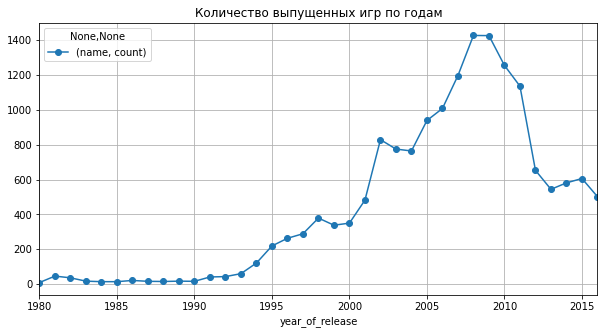

In [36]:
# выведем график полученных значений
games.groupby('year_of_release').agg({'name':['count']}).plot( style='o-', xlim=(1980, 2016), grid=True, figsize=(10, 5))
plt.title("Количество выпущенных игр по годам")

plt.show()

 В период с 1980 по 1990 годы количество вы пущенных игр оставалось примерно на одном уровне.Затем начинается рост  и  достигает максимальных показателей в период с 2006 по 2010 годы. Максимальное количество -1427 игр, вышло в 2008 году. Затем следует спад, который продолжается до 2016 года. Для анализа период с 1980 по 2010 годы рассматривать не имеет смысла, поскольку разброс данных очень большой и для тенденций ближайших периодов не показательный. Будем считать целесообразным анализировать период после 2010 года.

## Анализ продаж по платформам. 

In [37]:
# выведем  список платформ и суммы продаж
print(games.groupby('platform').agg({'total_sales':['count','sum', 'median']}))

         total_sales                
               count      sum median
platform                            
2600             116    86.48  0.480
3DO                3     0.10  0.020
3DS              512   257.81  0.120
DC                52    15.95  0.135
DS              2121   802.78  0.110
GB                97   254.43  1.180
GBA              811   312.88  0.160
GC               542   196.73  0.150
GEN               27    28.35  0.150
GG                 1     0.04  0.040
N64              316   218.01  0.270
NES               98   251.05  1.375
NG                12     1.44  0.100
PC               957   255.76  0.050
PCFX               1     0.03  0.030
PS              1190   727.58  0.260
PS2             2130  1245.30  0.230
PS3             1306   931.34  0.280
PS4              392   314.14  0.200
PSP             1194   289.54  0.090
PSV              429    53.81  0.050
SAT              173    33.59  0.120
SCD                6     1.86  0.065
SNES             239   200.04  0.320
T

In [38]:
# отсортируем таблицу по убыванию колонки 'total_sales' и сохраним в переменной games_total_sales
games.sort_values(by=['total_sales'], ascending=False).head(10)

# сохраним в переменной games_total_sales 10 игр с самыми большими значениями total_sales.
games_total_sales = games[games['total_sales'] >= 28.31]

In [39]:
# выведем переменную  games_total_sales на экран
display(games_total_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,unknown


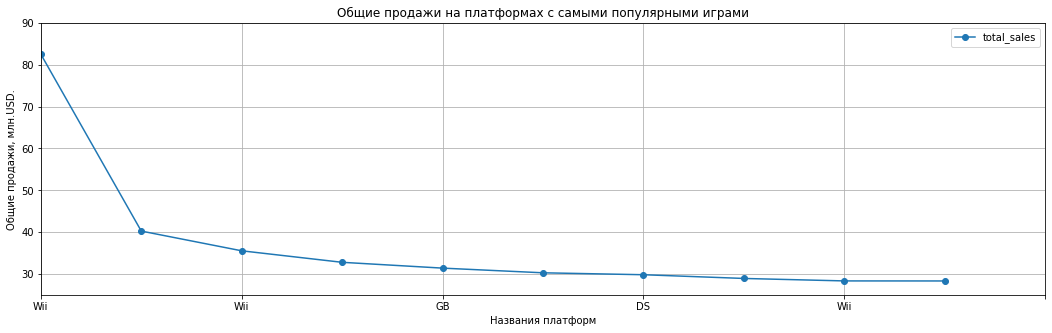

In [40]:
# выведем график общих продаж на платформах с 10 самыми продаваемыми играми
games_total_sales.plot(x='platform', y='total_sales',
     style='o-', xlim=(0, 10),
     ylim=(25,90), grid=True,
     figsize=(18, 5))
# подписи графика
plt.title("Общие продажи на платформах с самыми популярными играми")
plt.ylabel('Общие продажи, млн.USD.')
plt.xlabel('Названия платформ')          
plt.show()

In [41]:
# выведем сводную таблицу продаж на платформах 
pd.pivot_table(games_total_sales,values='total_sales',index= 'platform',columns=['year_of_release'])
          

year_of_release,1984.0,1985.0,1989.0,1996.0,2006.0,2008.0,2009.0
platform,,,,,,,
DS,NaN,NaN,NaN,NaN,29.800,NaN,NaN
GB,NaN,NaN,30.26,31.38,NaN,NaN,NaN
NES,28.31,40.24,NaN,NaN,NaN,NaN,NaN
Wii,NaN,NaN,NaN,NaN,55.725,35.52,30.545


In [42]:
# сохраним в переменной best_games_platform_total_sale 6 платформ с самыми высокими суммами продаж 
best_games_platform_total_sale = games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False)[:6]

# выведем  на экран список платформ 
print(best_games_platform_total_sale)


          total_sales
platform             
PS2           1245.30
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58


In [43]:
# сохраним в переменной life_platform_total_sale данные о сроках существования платформ
life_platform_total_sale = games_total_sales.groupby('platform').year_of_release.max() - games_total_sales.groupby('platform').year_of_release.min()
# выведем  информацию об основных показателях
life_platform_total_sale.describe()

count    4.000000
mean     2.750000
std      3.095696
min      0.000000
25%      0.750000
50%      2.000000
75%      4.000000
max      7.000000
Name: year_of_release, dtype: float64

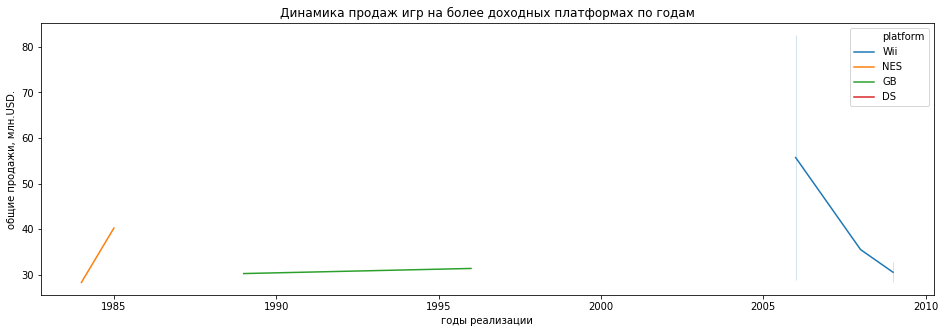

In [44]:
# выведем график динамики продаж на выбранных платформах
# размер фигуры
plt.figure(figsize=(16, 5))
# параметры графика
sns.lineplot(x=games_total_sales.year_of_release,
             y=games_total_sales.total_sales,
             hue=games_total_sales.platform,);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Динамика продаж игр на более доходных платформах по годам')
plt.show()

Срок  жизни наиболее прибыльных платформ варьируется от одного года (DS) до 7 лет (GB). График платформы GS не отразился из-за малого срока существования.

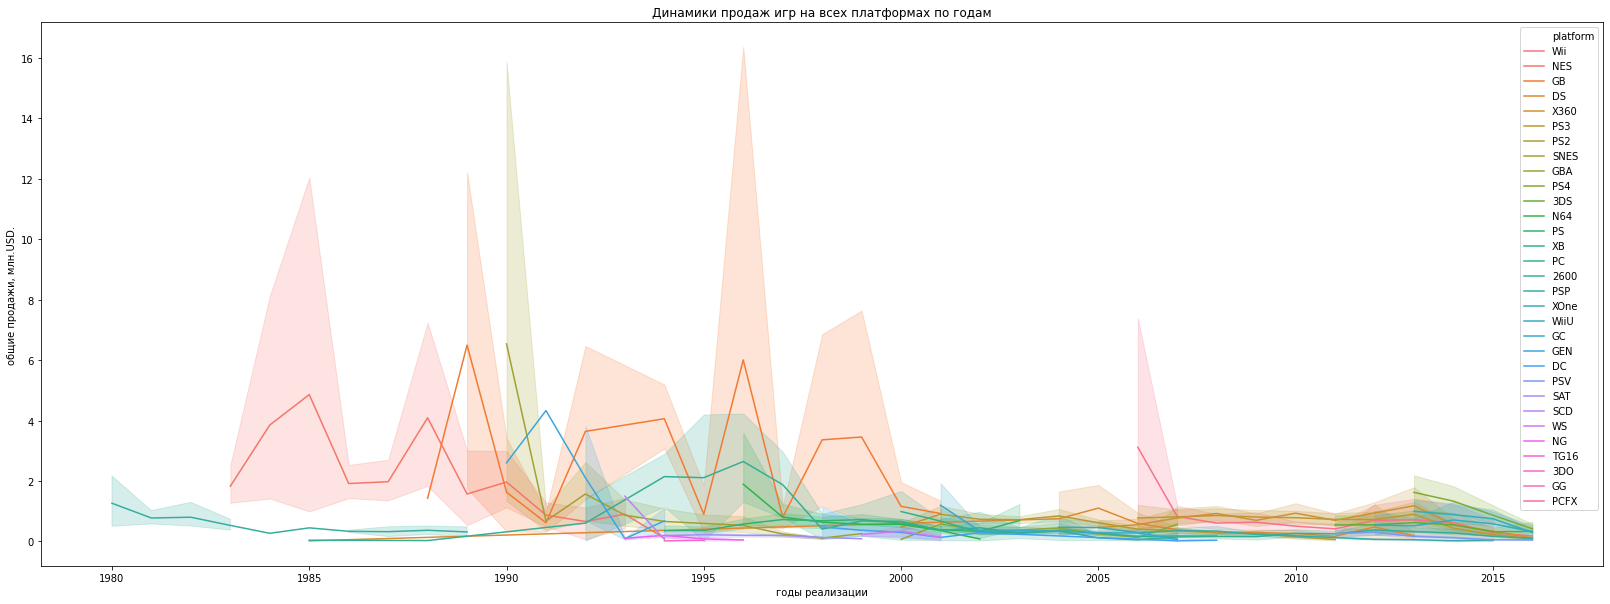

In [45]:
# построим график продаж на всех платформах за все годы
# размер фигуры
plt.figure(figsize=(28, 10))

# параметры графика
sns.lineplot(x=games.year_of_release,
             y=games.total_sales,
             hue=games.platform,);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Динамики продаж игр на всех платформах по годам')
plt.show()

In [46]:
# сохраним список платформ в списке platforms
platforms = ['PS2','X360','PS3','Wii','DS','PS']
# в переменной games_platforms_6 сохраним данные по избранным платформам
games_platforms_6 = games.query('platform == @platforms')
# выведем на экран первые 5 строк
display(games_platforms_6.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E


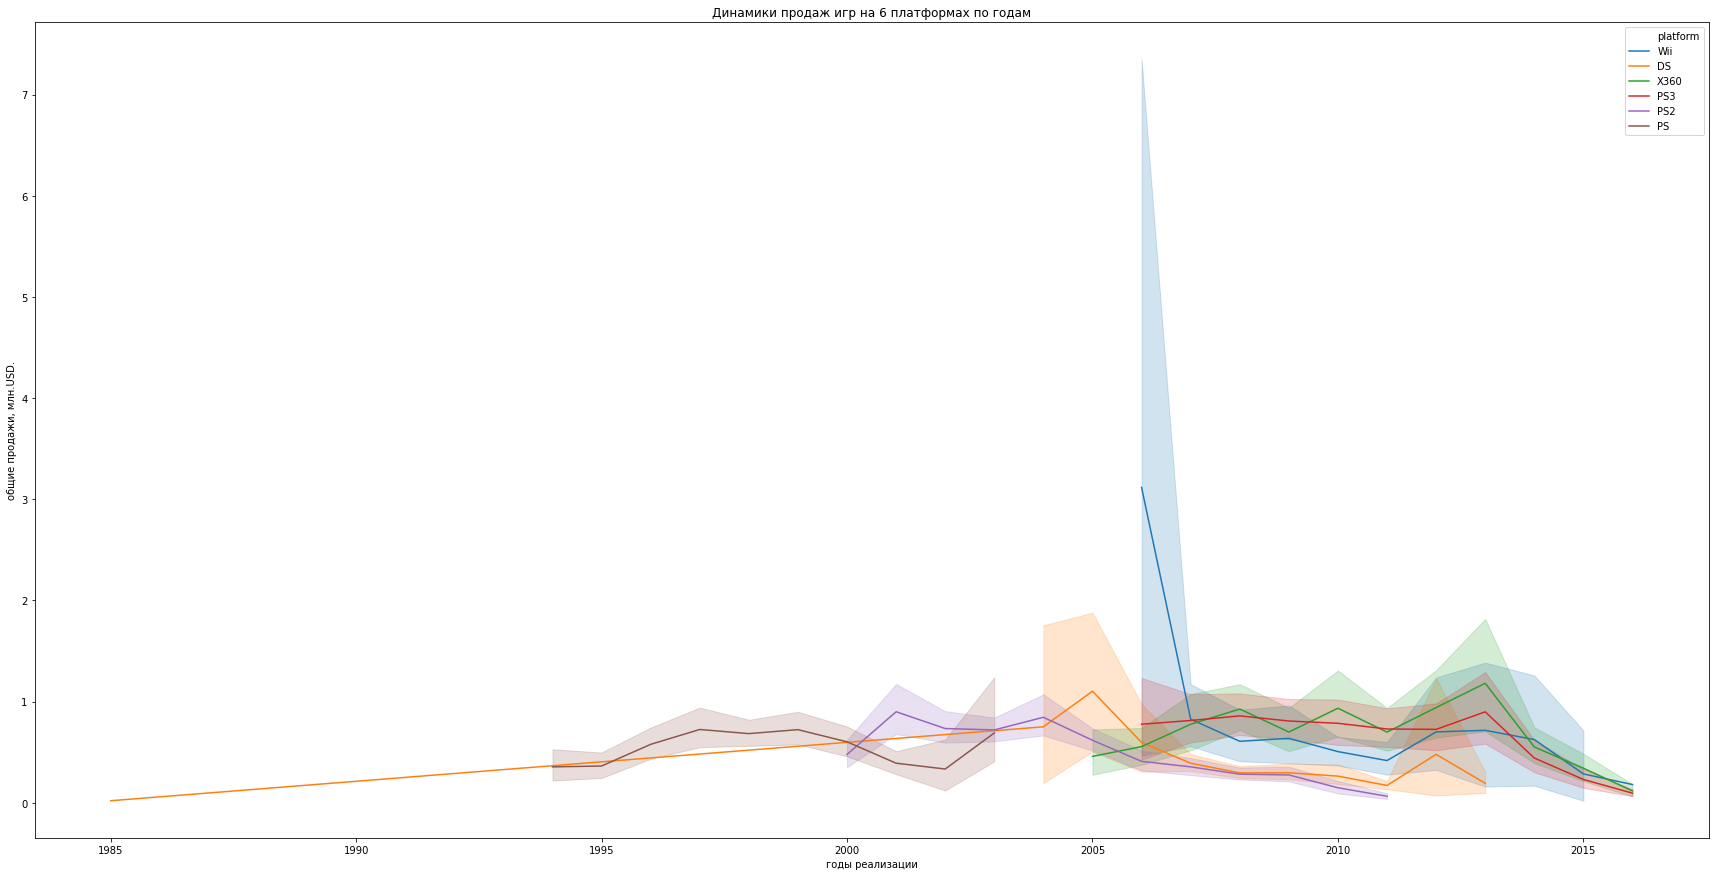

In [47]:
# построим график продаж на выбранных 6 платформах за все годы
# размер фигуры
plt.figure(figsize=(30, 15))

# параметры графика
sns.lineplot(x=games_platforms_6.year_of_release,
             y=games_platforms_6.total_sales,
             hue=games_platforms_6.platform,);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Динамики продаж игр на 6 платформах по годам')
plt.show()

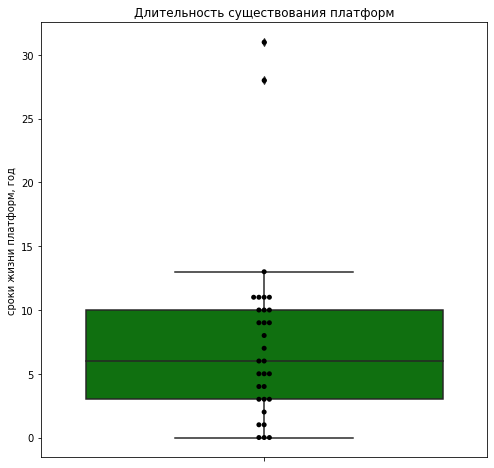

In [48]:
# сохраним в переменной life_platform продолжительность жизни платформ
life_platform = games.groupby('platform').year_of_release.max() - games.groupby('platform').year_of_release.min()

# зададим параметры для вывода графиков
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(8, 8)
)

# построим ящик с усами
sns.boxplot(y=life_platform, color='green', ax=ax1)
sns.swarmplot(y=life_platform, color='black')

# зададим подписи осей и  название графика
ax1.set_title('Длительность существования платформ')

ax1.set_ylabel('сроки жизни платформ, год');


In [49]:
# выведем информацию об основных параметрах
life_platform.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

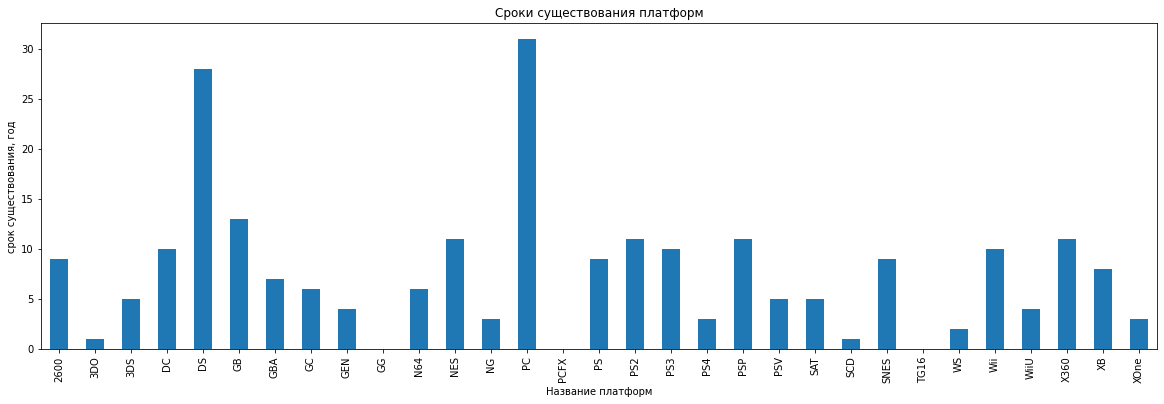

In [50]:
# построим гистограмму life_platform
life_platform.plot(y='year_of_release', kind='bar',figsize=(20, 6))
# подписи графика
plt.xlabel('Название платформ')
plt.ylabel('срок существования, год');
plt.title('Сроки существования платформ')
plt.show()

Резкльтат:

* Медианный срок жизни платформы составляет 6 лет, но есть платформы со сроком жизни 31 год и 1 год.

* Среди платформ с наибольшими продажами  срок жизни меняется от 1 до 7 лет,медианный срок жизни- 2 года.


##  Платформы-  лидеры  продаж. Выбор потенциально прибыльных платформ.

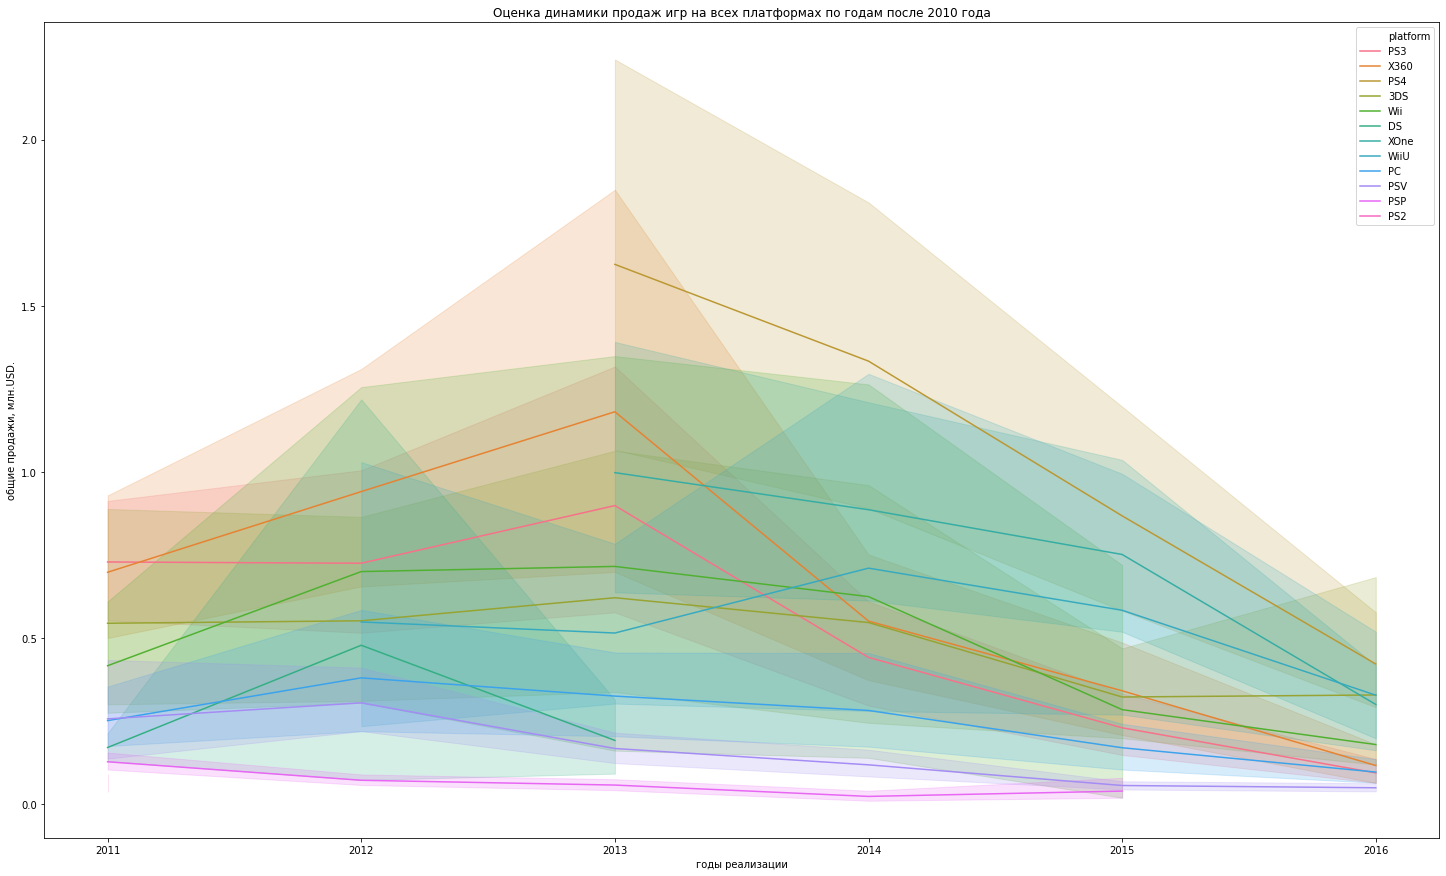

In [51]:
# построим график продаж на всех платформах за годы после 2010
games_2011= games[games['year_of_release']>2010]

# размер фигуры
plt.figure(figsize=(25, 15))

# параметры графика
sns.lineplot(x=games_2011.year_of_release,
             y=games_2011.total_sales,
             hue=games_2011.platform,);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Оценка динамики продаж игр на всех платформах по годам после 2010 года')
plt.show()

 На графике  видим, что динамика показателей продаж у большинства платформ к 2016 году снижается.  Внимание следует обратить на платформы PSV, WiiU и 3DS. Динамика их графиков показывает, в отличие от остальных, снижение продаж не такое резкое как у остальных либо отсутствие снижения в течение последних лет. Рассмотрим  их отдельно .

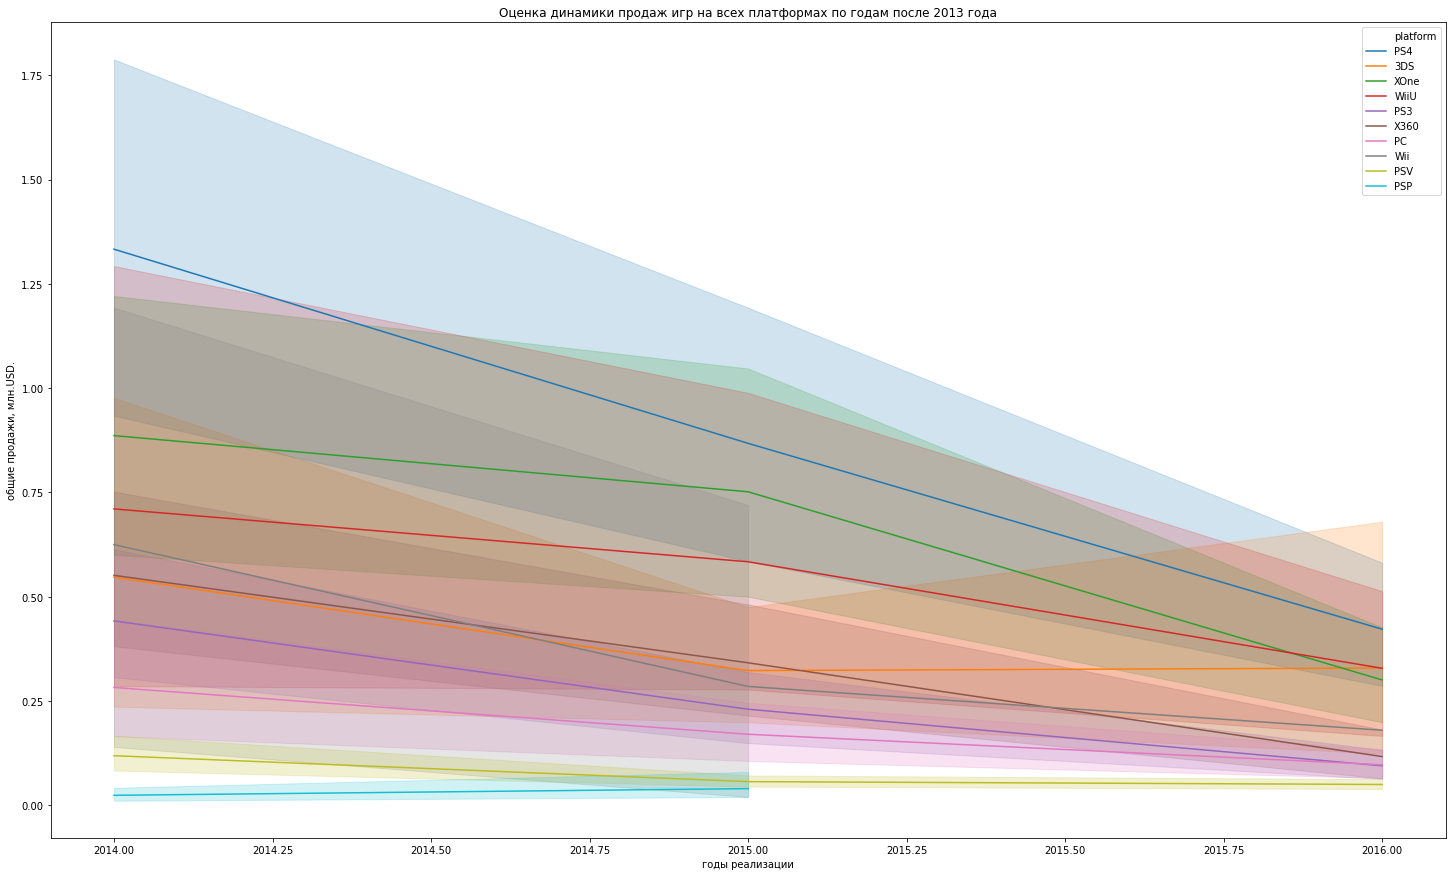

In [52]:
# построим график продаж на всех платформах за годы после 2013
games_2014= games[games['year_of_release']>2013]

# размер фигуры
plt.figure(figsize=(25, 15))

# параметры графика
sns.lineplot(x=games_2014.year_of_release,
             y=games_2014.total_sales,
             hue=games_2014.platform,);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Оценка динамики продаж игр на всех платформах по годам после 2013 года')
plt.show()

In [53]:
# сохраним список лучших платформ  в список platforms_best
platforms_best = ['PS4','WiiU','3DS']
# сохраним в переменной games_2014_filtered данные только по избранным платформам
games_2014_filtered = games_2014.query('platform == @platforms_best') \
          .reset_index(drop=True)
#выведем на экран первые 5 строк полученной таблицы
display(games_2014_filtered.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,unknown
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,unknown
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,unknown


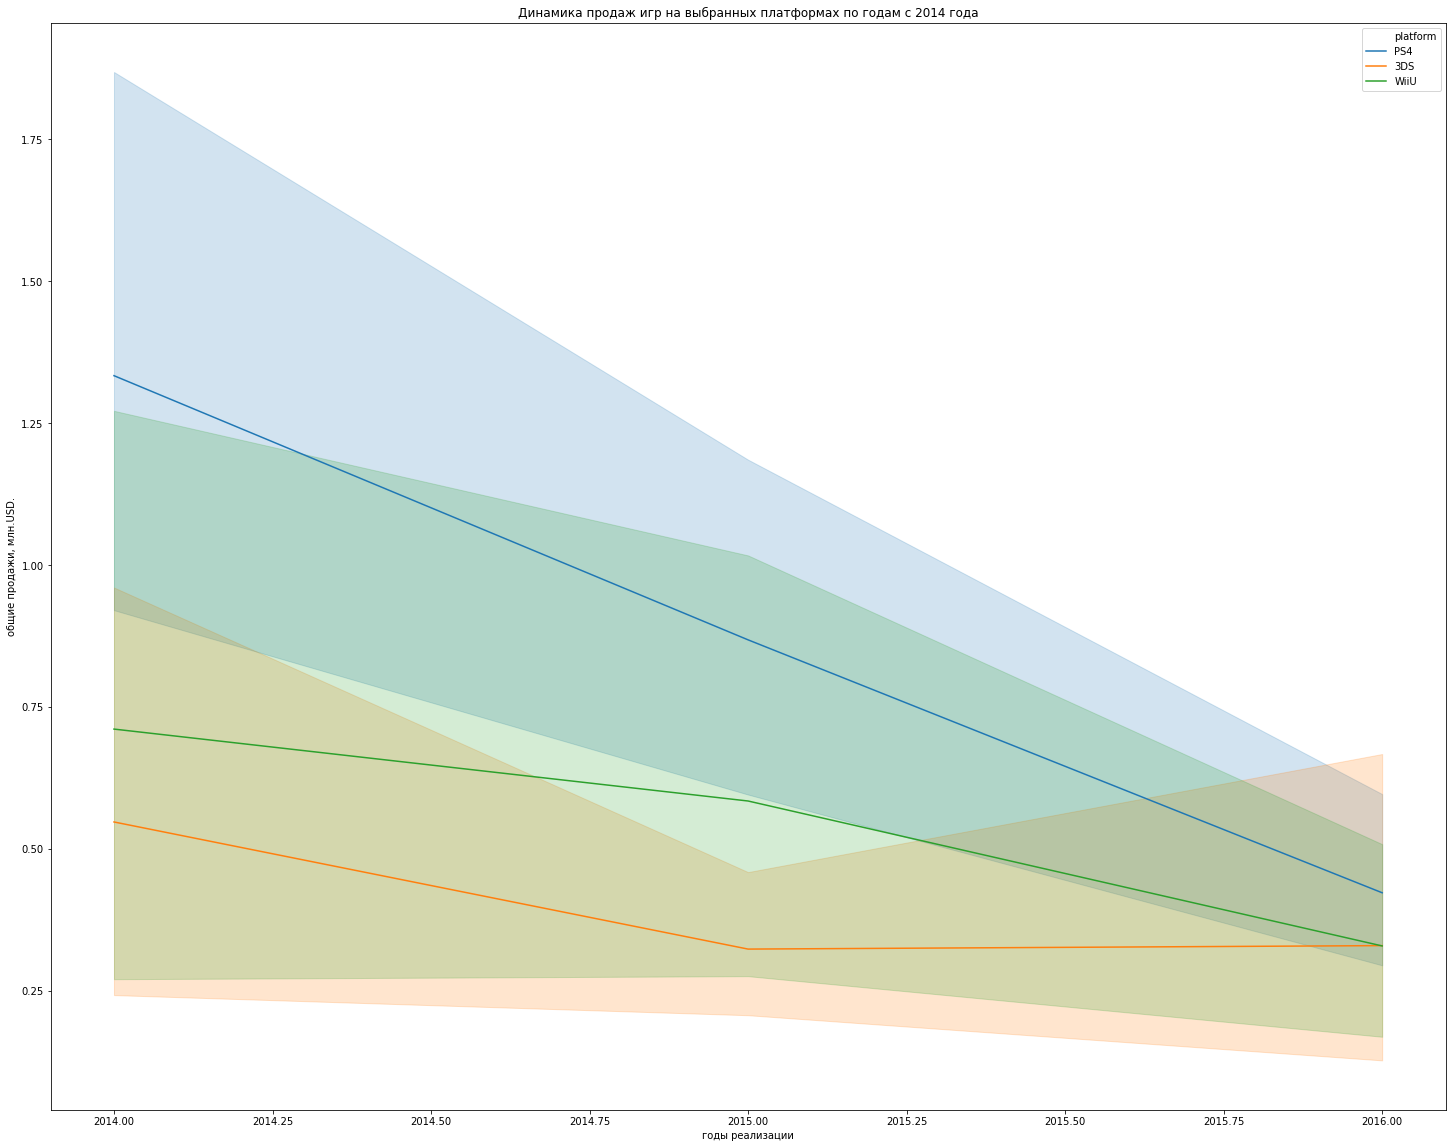

In [54]:
# построим график продаж на выбранных платформах за годы с 2014
# размер фигуры
plt.figure(figsize=(25, 20))

# параметры графика
sns.lineplot(x=games_2014_filtered.year_of_release,
             y=games_2014_filtered.total_sales,
             hue=games_2014_filtered.platform);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Динамика продаж игр на выбранных платформах по годам c 2014 года')
plt.show()

In [55]:
# сохраним список платформ с положительной динамикой в список platforms_up
platforms_up = ['PSV','WiiU','3DS']
# сохраним в переменной games_2010_filtered 
games_2011_filtered = games_2011.query('platform in @platforms_up') \
          .reset_index(drop=True)



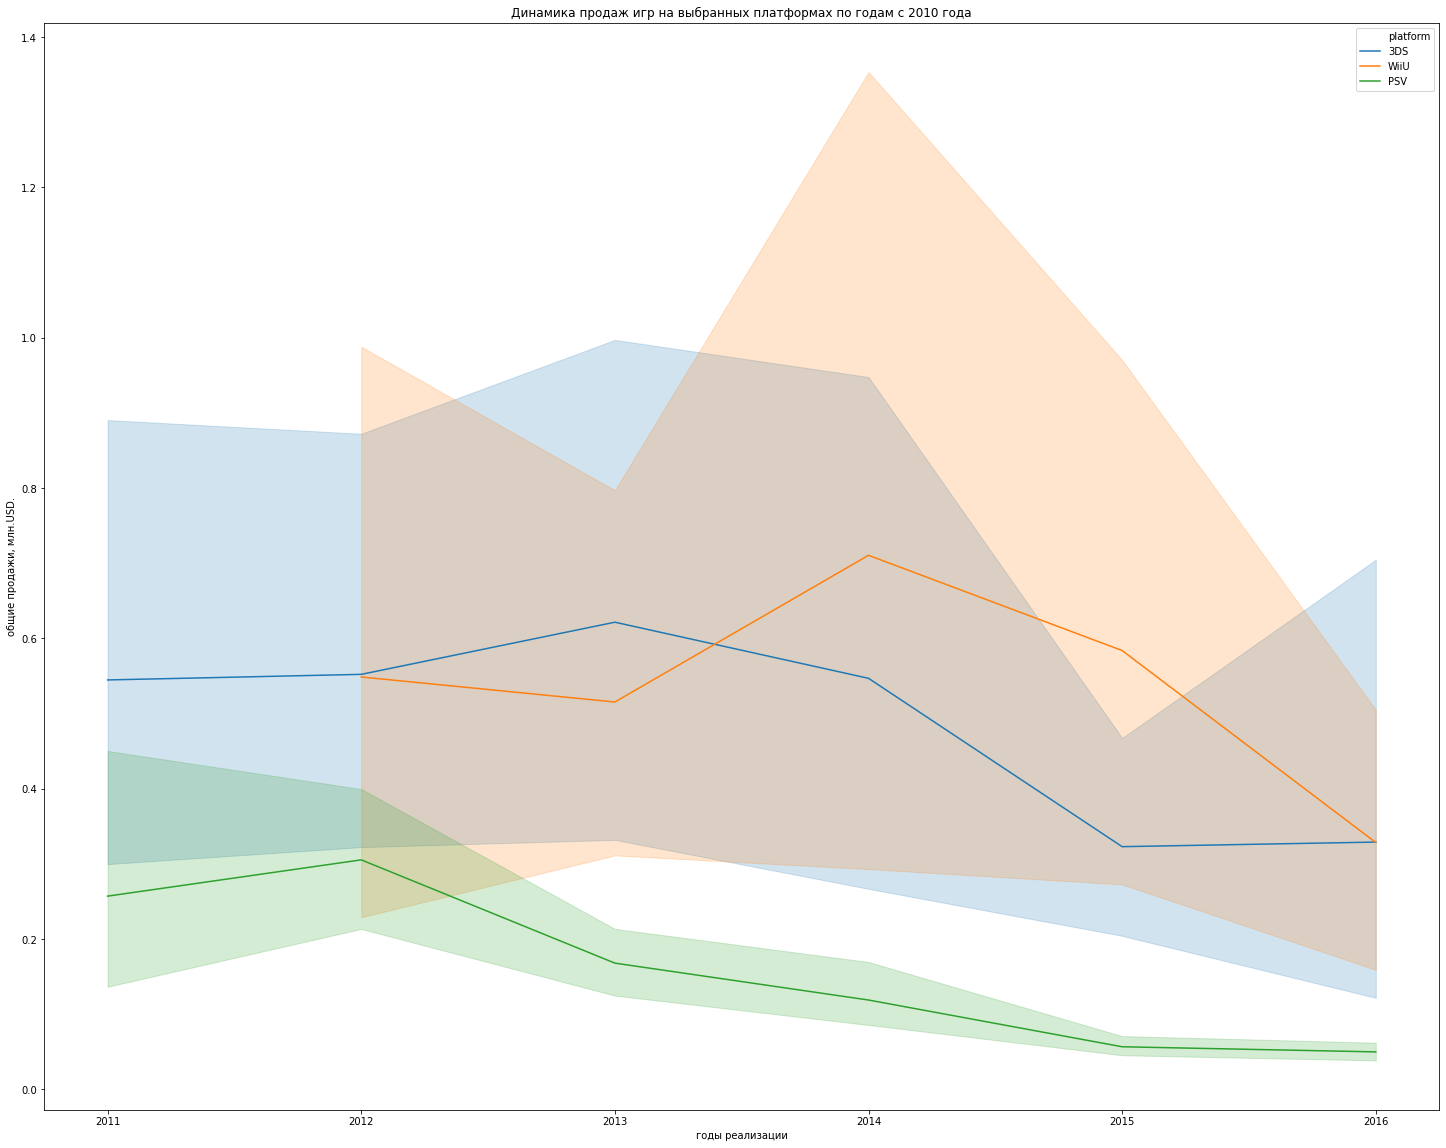

In [56]:
# построим график продаж на выбранных платформах за годы с 2010
# размер фигуры
plt.figure(figsize=(25, 20))

# параметры графика
sns.lineplot(x=games_2011_filtered.year_of_release,
             y=games_2011_filtered.total_sales,
             hue=games_2011_filtered.platform);

# зададим подписи осей и графика
plt.xlabel('годы реализации')
plt.ylabel('общие продажи, млн.USD.');
plt.title('Динамика продаж игр на выбранных платформах по годам c 2010 года')
plt.show()

In [57]:
# выведем информацию об основных показателях колонки 'total_sales'
games_2011_filtered['total_sales'].describe()

count    1088.000000
mean        0.361958
std         1.087032
min         0.010000
25%         0.030000
50%         0.100000
75%         0.262500
max        14.600000
Name: total_sales, dtype: float64

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

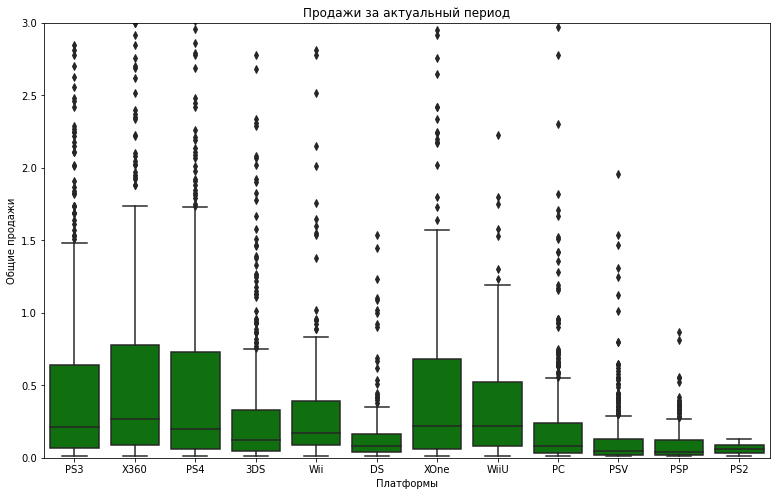

In [58]:
 # выведем диаграммы "ящик с усами" на всех платформах за период с 2011 года
plt.figure(figsize=(13, 8))

(sns.boxplot(data = games_2011, x = 'platform', y = 'total_sales', color = 'green') .set(title = 'Продажи за актуальный период', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

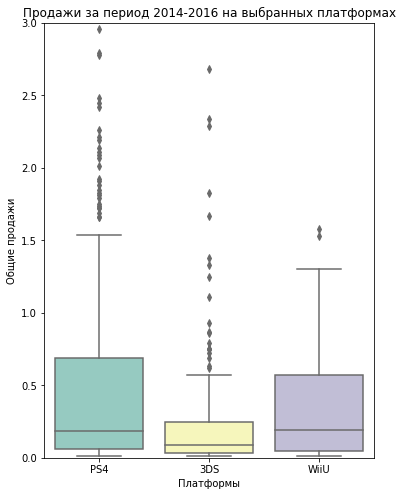

In [59]:
# построим диаграммы "ящик с усами" на избранных платформах за период 2014-2016 годы
plt.figure(figsize=(13, 8))
plt.subplot(121)
sns.boxplot(x='platform', y='total_sales', data=games_2014_filtered, palette='Set3').set(title = 'Продажи за период 2014-2016 на выбранных платформах', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,3))

plt.show()

Анализируя ящики с усами по общей выручке с платформ, заметим разброс значений выбросов:
выбросы изменяются от  1,9 до 14,1 млн.USD. Медианные значения на всех трёх платформах имеют близкие показатели и составляют  от 0,09 до 0,2 млн.USD. 

## Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Для анализа отзывов на продажи  выберем платформу 3DS.

In [60]:
# сохраним в переменной games_2011_filtered_3DS строки с платформой 3DS
games_2011_filtered_3DS = games_2011_filtered.query('platform == "3DS"')

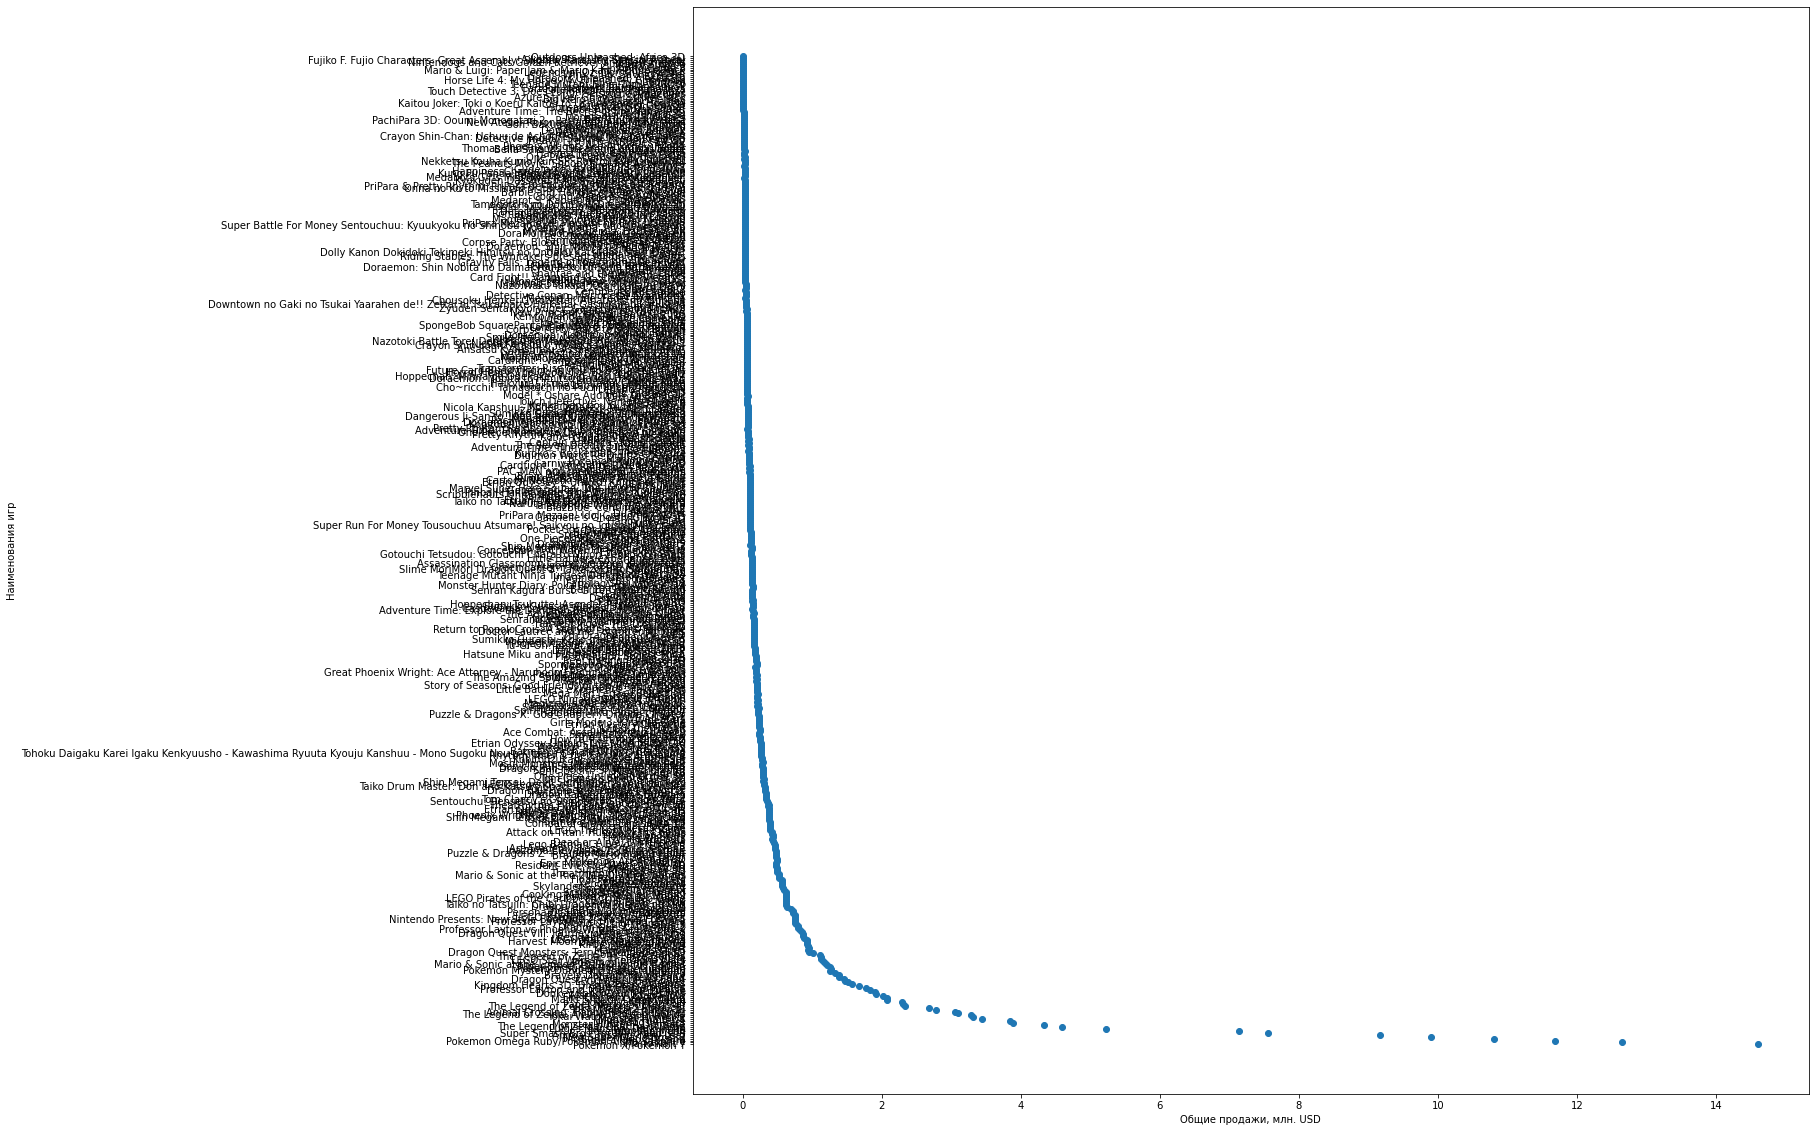

In [61]:
# выведем зависимость общих продаж и наименований игр
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x = games_2011_filtered_3DS['total_sales'], y = games_2011_filtered_3DS['name'])
plt.xlabel("Общие продажи, млн. USD")
plt.ylabel("Наименования игр")

plt.show()

In [62]:
# сохраним в переменной games_2014_filtered_3DS строки с платформой 3DS
games_2014_filtered_3DS = games_2014_filtered.query('platform == "3DS"')

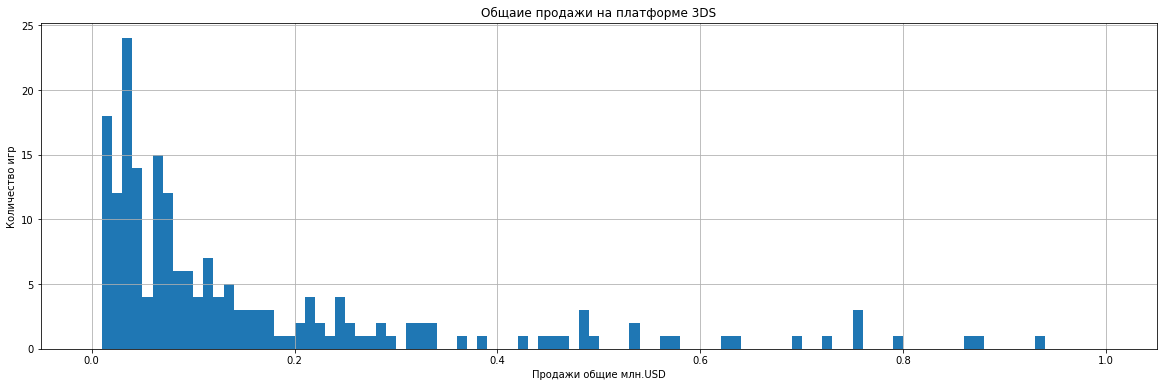

In [63]:
# построим гистограмму общих продаж на платформе 3DS 2014-2016гг
games_2014_filtered_3DS['total_sales'].hist(bins=100, range=(0, 1),figsize=(20, 6))
# подписи графика
plt.xlabel('Продажи общие млн.USD')
plt.ylabel('Количество игр');
plt.title('Общаие продажи на платформе 3DS')
plt.show()

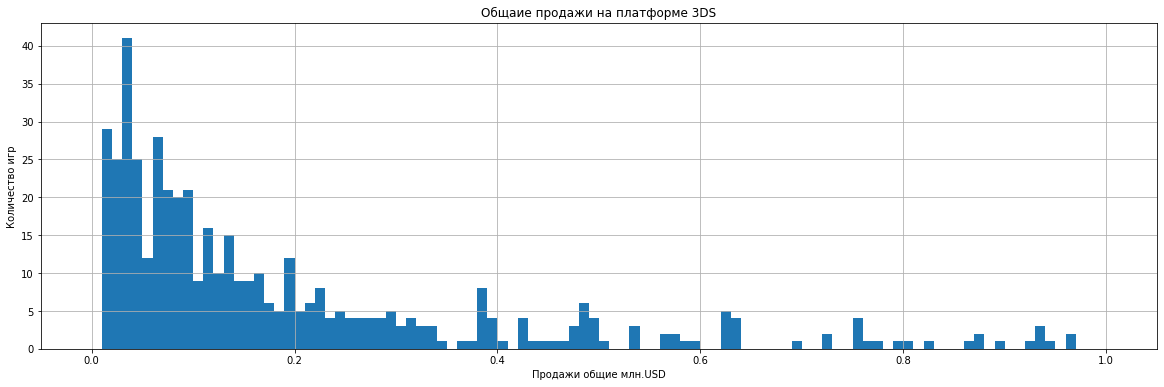

In [64]:
# построим гистограмму общих продаж на платформе 3DS
games_2011_filtered_3DS['total_sales'].hist(bins=100, range=(0, 1),figsize=(20, 6))
# подписи графика
plt.xlabel('Продажи общие млн.USD')
plt.ylabel('Количество игр');
plt.title('Общаие продажи на платформе 3DS')
plt.show()

### Диаграмма рассеяния и расчет корреляции между отзывами и продажами.

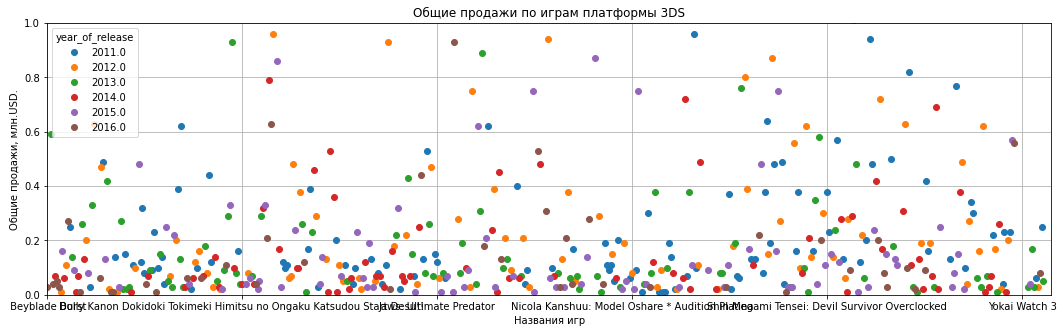

In [65]:
# выведем диаграмму рассеяния общих продаж на платформе 3DS за период после 2010 года 
pd.pivot_table(games_2011_filtered_3DS, values='total_sales',index='name',columns=['year_of_release']).plot(
     style='o', xlim=(0, 515),
     ylim=(0,1), grid=True,
     figsize=(18, 5))
# подписи графика
plt.title("Общие продажи по играм платформы 3DS")
plt.ylabel('Общие продажи, млн.USD.')
plt.xlabel('Названия игр')          
plt.show()

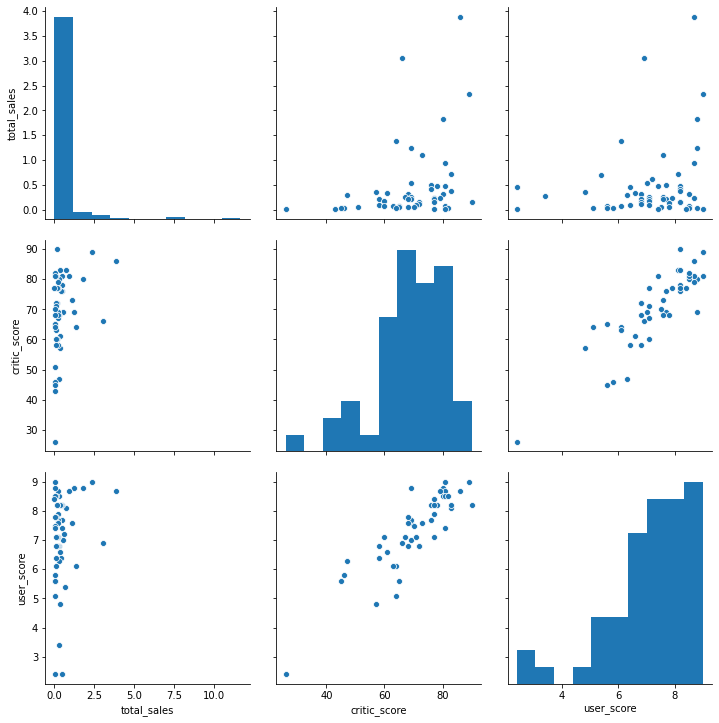

In [66]:
# для визуализации параметров используем метод sns.pairplot для отображения корреляции всех графиков 2014-2016 гг
games_corr_2014 =  games_2014_filtered_3DS[['total_sales','critic_score','user_score']]

sns.pairplot(games_corr_2014,height=3.4)
plt.show()

In [67]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей 2014-2016гг

games_2014_filtered_3DS[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


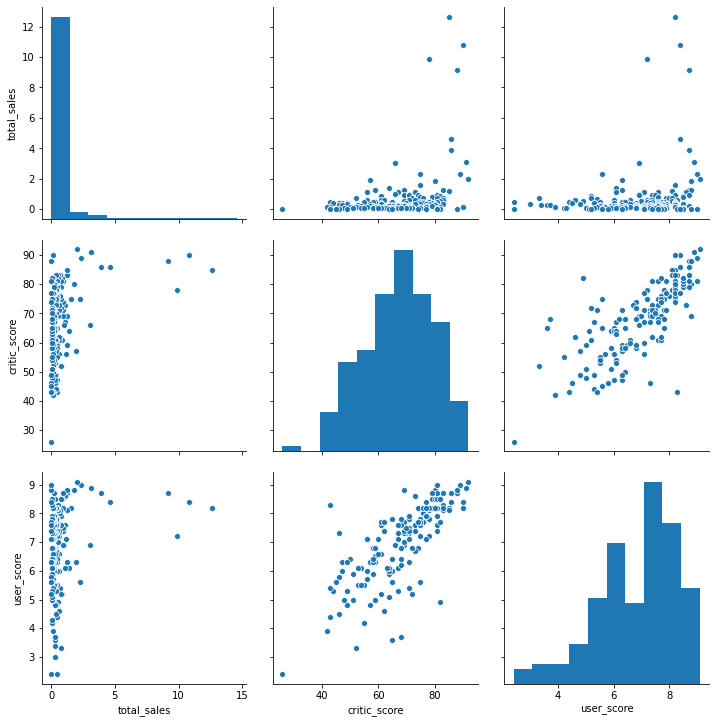

In [68]:
# для визуализации параметров используем метод sns.pairplot для отображения корреляции всех графиков
games_corr =  games_2011_filtered_3DS[['total_sales','critic_score','user_score']]

sns.pairplot(games_corr,height=3.4)
plt.show()

In [69]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей

games_2011_filtered_3DS[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


### Выводы в сравнении  с продажами игр на других платформах.

Корреляция общих продаж и оценок есть, она прямая, нелинейная и слабая. Оценки критиков и пользователей имеют сильную прямую линейную корреляцию.

Посмотрим как коррелируют продажи на двух других платформах WiiU и PSV.

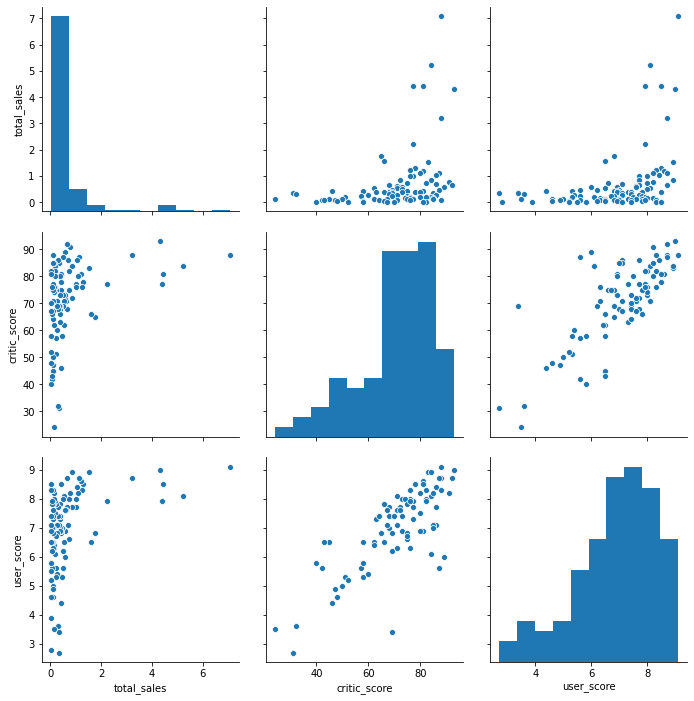

In [70]:
# для визуализации параметров WiiU используем метод sns.pairplot для отображения корреляции всех графиков
games_corr_WiiU =  games_2011_filtered.query('platform=="WiiU"')[['total_sales','critic_score','user_score']]

sns.pairplot(games_corr_WiiU,height=3.3)
plt.show()

In [71]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей WiiU

games_2011_filtered.query('platform=="WiiU"')[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


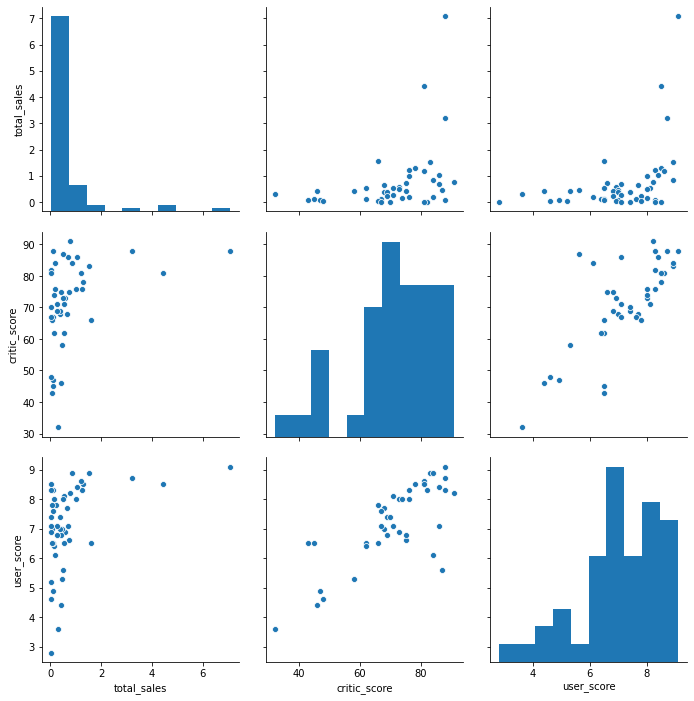

In [72]:
# для визуализации параметров WiiU используем метод sns.pairplot для отображения корреляции всех графиков 2014-2016гг
games_2014_corr_WiiU =  games_2014_filtered.query('platform=="WiiU"')[['total_sales','critic_score','user_score']]

sns.pairplot(games_2014_corr_WiiU,height=3.3)
plt.show()

In [73]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей WiiU 2014-2016гг

games_2014_filtered.query('platform=="WiiU"')[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


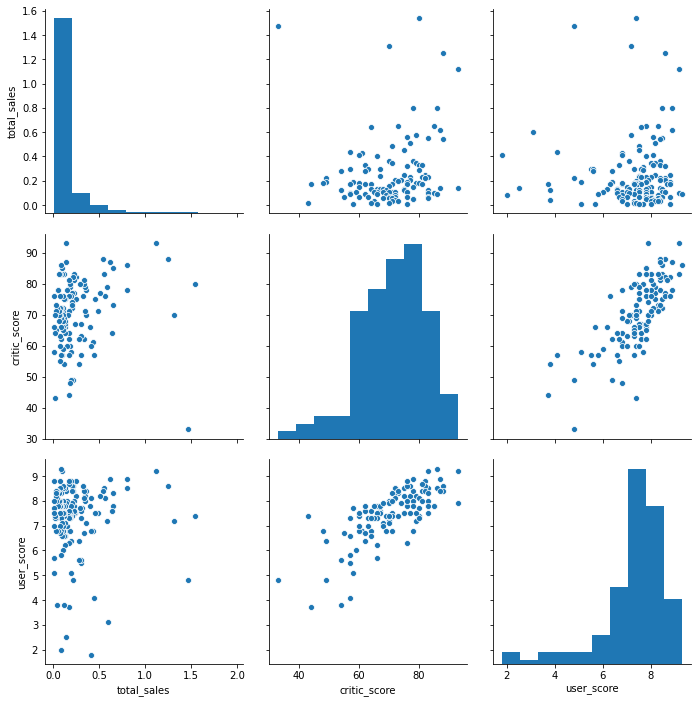

In [74]:
# для визуализации параметров PSV используем метод sns.pairplot для отображения корреляции всех графиков
games_corr_PSV =  games_2011_filtered.query('platform=="PSV"')[['total_sales','critic_score','user_score']]

sns.pairplot(games_corr_PSV,height=3.3)
plt.show()

In [75]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей PSV

games_2011_filtered.query('platform=="PSV"')[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.131763,0.013489
critic_score,0.131763,1.000000,0.734300
user_score,0.013489,0.734300,1.000000


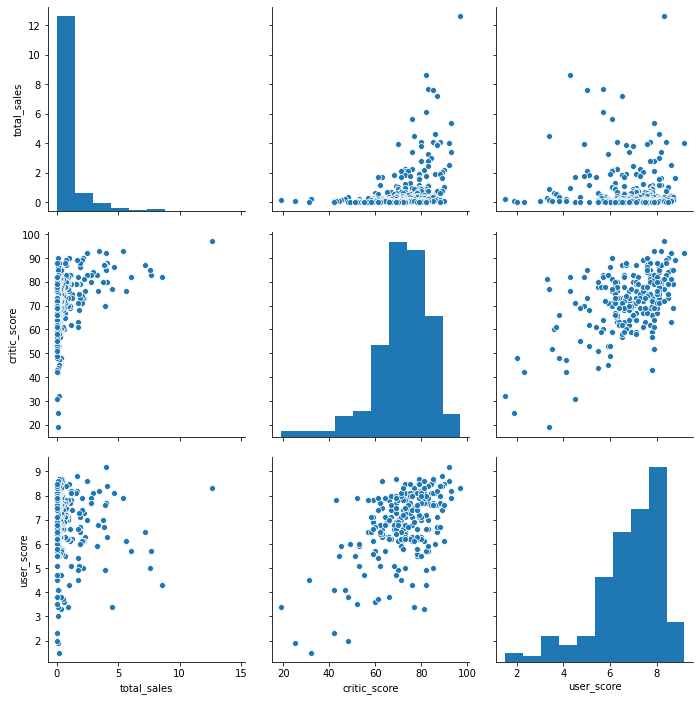

In [76]:
# для визуализации параметров PS4 используем метод sns.pairplot для отображения корреляции всех графиков 2014-2016гг
games_2014_corr_PS4 =  games_2014_filtered.query('platform=="PS4"')[['total_sales','critic_score','user_score']]

sns.pairplot(games_2014_corr_PS4,height=3.3)
plt.show()

In [77]:
# найдём корреляцию Пирсона между общими продажами и оценками критиков и пользователей PS4 2014-2016гг

games_2014_filtered.query('platform=="PS4"')[['total_sales','critic_score','user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Результат сравнения корреляций на платформах:
    
* корреляция оценок критиков и пользователей на всех платформах сильная прямая и линейная (около 0,7)

* корреляция продаж и оценок на всех платформах слабая прямая нелинейная. 

Но если на плтформе PSV коэффициенты корреляции продаж к оценкам критиков и оценкам пользователей близки к нулю (0,13 и 0,013 соответсвенно), то на платформах 3DS и WiiU эти показатели  несколко выше: 

3DS-0,3 и 0,2

WiiU-0,3 и 0,4 соответственно.


## Анализ общего распределения игр по жанрам. Жанры с высокими и низкими продажами.

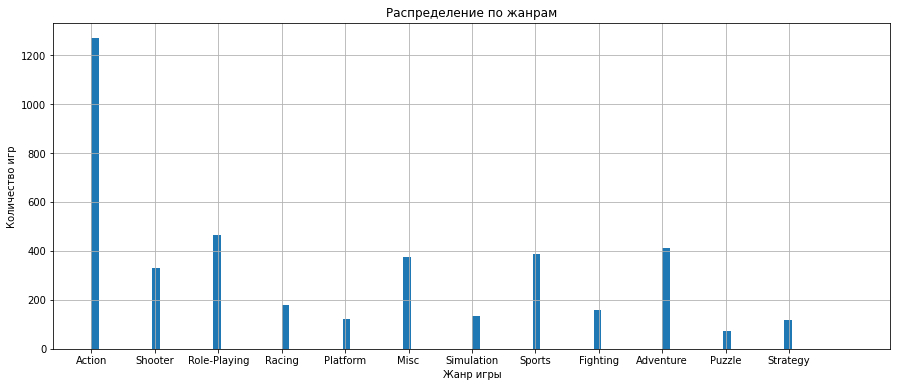

In [78]:
# выведем гистограмму games_2011 по колонке 'genre'
games_2011['genre'].hist(bins=100, range=(0,12),figsize=(15, 6))
# подписи графика
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр');
plt.title('Распределение по жанрам')
plt.show()

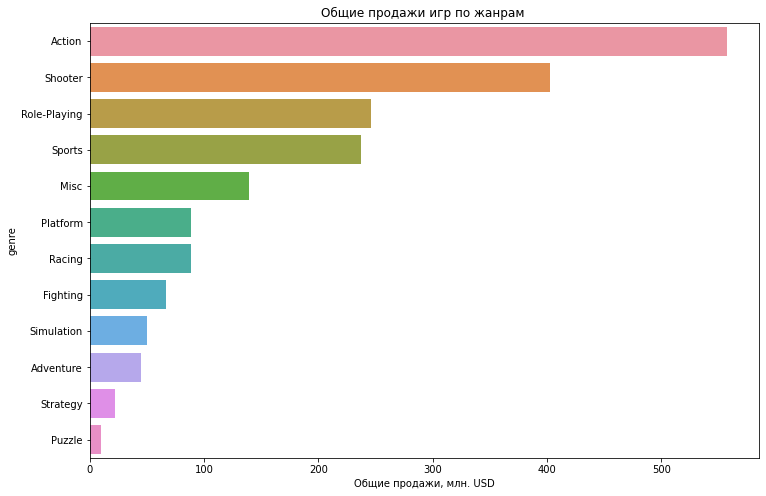

In [79]:
# сохраним а переменной games_genres сгруппированную по жанрам и отсортированную по общим продажам таблицу 

games_genres = games_2011.groupby(['genre'], as_index=False).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)

# размер фигуры
plt.figure(figsize=(12, 8))

# зададим параметры построения графика
ax = sns.barplot(y=games_genres.genre,
                 x=games_genres.total_sales)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по жанрам ');


Результат:

* наибольшее количество игр выпускаются в жанре Action, а наименьшее- в жанре Puzzle

* наибольшие суммы продаж обеспечивают игры в жанре Action, а наименьшее значение сумм продаж приходится на жанр Strategy.

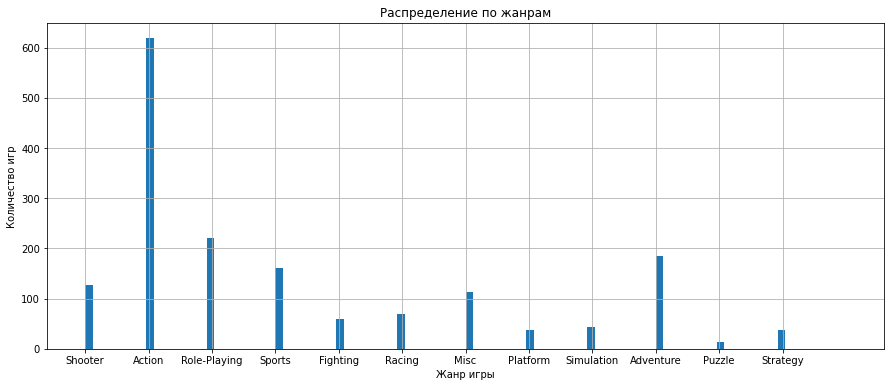

In [80]:
# выведем гистограмму games_2014 по колонке 'genre'
games_2014['genre'].hist(bins=100, range=(0,12),figsize=(15, 6))
# подписи графика
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр');
plt.title('Распределение по жанрам')
plt.show()

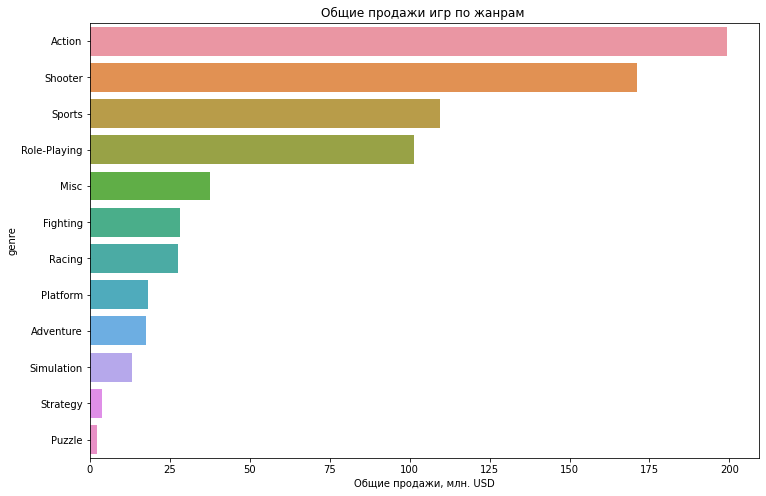

In [81]:
# сохраним а переменной games_genres сгруппированную по жанрам и отсортированную по общим продажам таблицу 2014-2016гг

games_genres_2014 = games_2014.groupby(['genre'], as_index=False).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)

# размер фигуры
plt.figure(figsize=(12, 8))

# зададим параметры построения графика
ax = sns.barplot(y=games_genres_2014.genre,
                 x=games_genres_2014.total_sales)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по жанрам ');


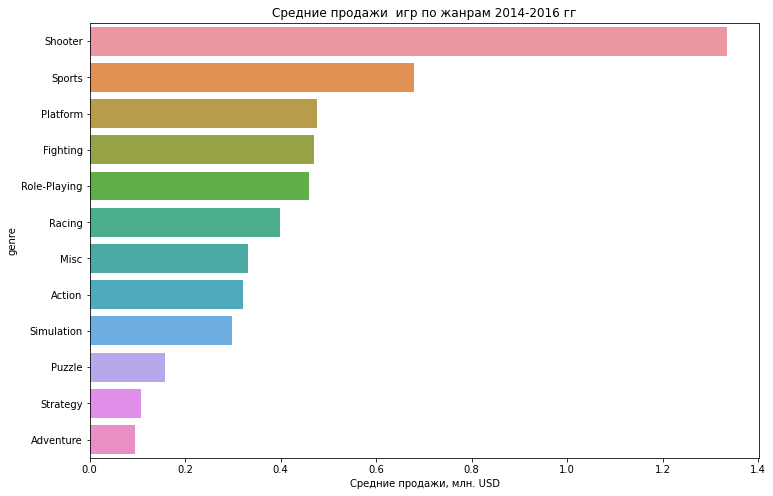

In [82]:
# сохраним а переменной games_genres сгруппированную по жанрам и отсортированную по средним продажам таблицу 2014-2016гг

games_genres_2014_mean = games_2014.groupby(['genre'], as_index=False).agg({'total_sales': 'mean'}).sort_values('total_sales', ascending=False)

# размер фигуры
plt.figure(figsize=(12, 8))

# зададим параметры построения графика
ax = sns.barplot(y=games_genres_2014_mean.genre,
                 x=games_genres_2014_mean.total_sales)
                 
# подписи осей и названия
plt.xlabel('Средние продажи, млн. USD')
plt.title('Средние продажи  игр по жанрам 2014-2016 гг');


    
* наибольшее количество игр выпускаются в жанре Action, а наименьшее- в жанре Puzzle.

* наибольшие суммы продаж обеспечивают игры в жанре Action, а наименьшее значение сумм продаж приходится, как и количество продаваемых игр, на жанр Puzzle. Но средняя сумма продаж игр жанра Action находится лишь на восьмом месте рейтинга. Таким образом высокий уровень продаж обеспечивается не высокой средней стоимостью , а большим количеством игр. 
    
* наибольшую (почти вдвое больше последующего показателя) среднюю сумму продаж имеют игры в жанре Shooter, а наименьшая средняя сумма продаж у игр в жанре Adventure. Жанр Shooter находится на пятом месте по количеству игр и на втором - по общим продажам. Игры жанра Shooter являются наиболее дорогими, но и наиболее выгодными с точки зрения обеспечения объема продаж. В то же время игры в жанре Adventure занимают третье место по количеству и девятое - по сумме общих продаж.


# Портрет пользователя по регионам  (NA, EU, JP).

## Самые популярные платформы (топ-5), различия в долях продаж.

In [83]:
# Выведем 5 самых популярных платформ 

print(games_2011.value_counts('platform').head(5))

platform
PS3     708
3DS     512
X360    498
PSV     429
PS4     392
dtype: int64


In [84]:
# сохраним в переменной games_reg_pl нужные для анализа колонки и сгруппируем по названиям платформ 
games_reg_pl = games_2011[['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['platform'])\
.sort_values('value', ascending=False)

In [85]:
# сохраним в переменной games_reg_pl_na топ 5 популярных платформ
games_reg_pl_na  = games_reg_pl.query('variable == "na_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_na)

  platform  variable   value
0     X360  na_sales  226.80
1      PS3  na_sales  168.26
2      PS4  na_sales  108.74
3     XOne  na_sales   93.12
4      3DS  na_sales   82.65


In [86]:
# сохраним в переменной games_reg_pl_eu топ 5 популярных платформ
games_reg_pl_eu  = games_reg_pl.query('variable == "eu_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_eu)

  platform  variable   value
0      PS3  eu_sales  163.10
1      PS4  eu_sales  141.09
2     X360  eu_sales  117.10
3      3DS  eu_sales   61.27
4       PC  eu_sales   56.70


In [87]:
# сохраним в переменной games_reg_pl_jp топ 5 популярных платформ
games_reg_pl_jp  = games_reg_pl.query('variable == "jp_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_jp)

  platform  variable   value
0      3DS  jp_sales  100.62
1      PS3  jp_sales   49.39
2      PSP  jp_sales   24.04
3      PSV  jp_sales   21.84
4      PS4  jp_sales   15.96


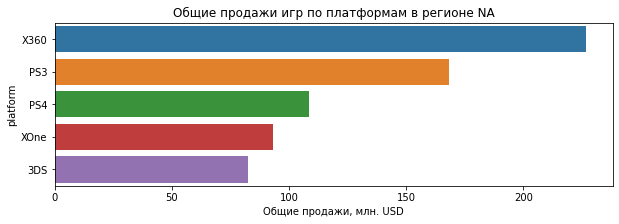

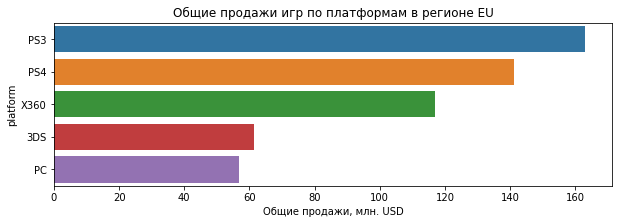

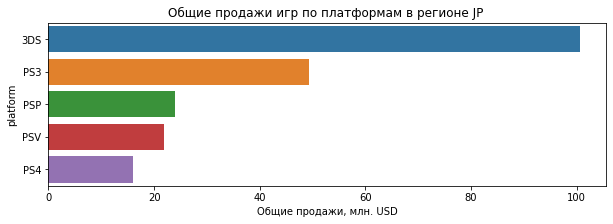

In [88]:
# выведем полученные данные по регионам нa в графике

# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax = sns.barplot(y=games_reg_pl_na.platform,
                 x=games_reg_pl_na.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе NA');


# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax1 = sns.barplot(y=games_reg_pl_eu.platform,
                  x=games_reg_pl_eu.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе EU');

# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax2 = sns.barplot(y=games_reg_pl_jp.platform,
                  x=games_reg_pl_jp.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе JP ');



Наиболее популярные платформы у пользователей регионов оказались различны:

* X360 в северо-американском регионе в 1,4 раза опережает PS3 -вторую по популярности платформу и в 2,7 раза- пятую платформу 3DS.
* в Европе отрыв популярнейшей платформы не так очевиден: PS3 превосходит по популярности  следующую PS4 в 1,16 раза, а пятую PC - в 2,9 раза  
* 3DS в Японии опережает вторую по популярности платформу  PS3 аж в 2 раза, а пятую PS4- более чем в 5 раз.



In [89]:
# Выведем 5 самых популярных платформ 2014-2016гг

print(games_2014.value_counts('platform').head(5))

platform
PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
dtype: int64


In [90]:
# сохраним в переменной games_reg_pl_2014 нужные для анализа колонки и сгруппируем поназваниям платформ 2014-2016гг 
games_reg_pl_2014 = games_2014[['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['platform'])\
.sort_values('value', ascending=False)

In [91]:
# сохраним в переменной games_reg_pl_na топ 5 популярных платформ 2014-2016гг
games_reg_pl_na_2014  = games_reg_pl_2014.query('variable == "na_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_na_2014)

  platform  variable  value
0      PS4  na_sales  98.61
1     XOne  na_sales  81.27
2     X360  na_sales  28.30
3      3DS  na_sales  22.64
4      PS3  na_sales  22.05


In [92]:
# сохраним в переменной games_reg_pl_eu топ 5 популярных платформ 2014-2016 гг
games_reg_pl_eu_2014  = games_reg_pl_2014.query('variable == "eu_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_eu_2014)

  platform  variable   value
0      PS4  eu_sales  130.04
1     XOne  eu_sales   46.25
2      PS3  eu_sales   25.54
3       PC  eu_sales   17.97
4      3DS  eu_sales   16.12


In [93]:
# сохраним в переменной games_reg_pl_jp топ 5 популярных платформ 2014-2016 гг
games_reg_pl_jp_2014  = games_reg_pl_2014.query('variable == "jp_sales" ').reset_index(drop=True).loc[:4]
# выведем на экран 5 популярных платформ na
print(games_reg_pl_jp_2014)

  platform  variable  value
0      3DS  jp_sales  44.24
1      PS4  jp_sales  15.02
2      PSV  jp_sales  14.54
3      PS3  jp_sales  11.22
4     WiiU  jp_sales   7.31


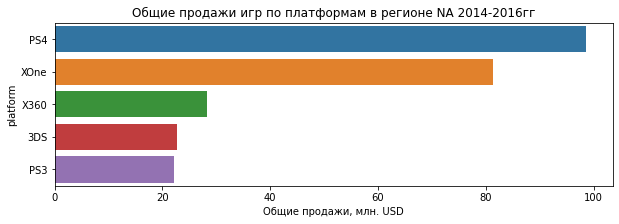

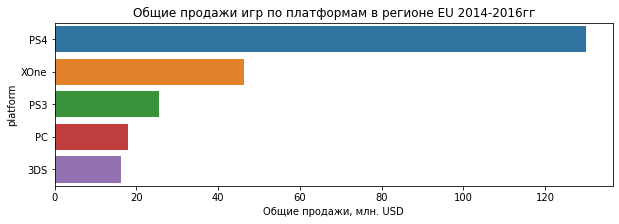

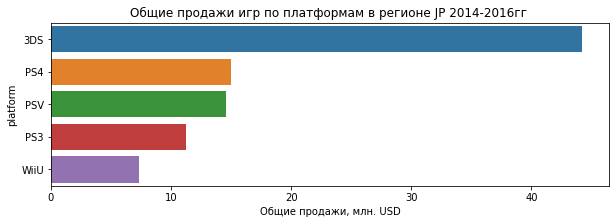

In [94]:
# выведем полученные данные по регионам нa в графике 2014-2016гг

# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax = sns.barplot(y=games_reg_pl_na_2014.platform,
                 x=games_reg_pl_na_2014.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе NA 2014-2016гг');


# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax1 = sns.barplot(y=games_reg_pl_eu_2014.platform,
                  x=games_reg_pl_eu_2014.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе EU 2014-2016гг');

# размер фигуры
plt.figure(figsize=(10, 3))

# зададим параметры построения графика
ax2 = sns.barplot(y=games_reg_pl_jp_2014.platform,
                  x=games_reg_pl_jp_2014.value)
                 
# подписи осей и названия
plt.xlabel('Общие продажи, млн. USD')
plt.title('Общие продажи игр по платформам в регионе JP 2014-2016гг ');




    
Наиболее популярные платформы у пользователей регионов оказались различны:

В северо-американском регионе PS4  в 1,2 раза опережает XOne -вторую по популярности платформу и в 4,5 раза - пятую платформу PS3.
в Европе отрыв популярнейшей платформы более чем очевиден: PS4 превосходит по популярности следующую XOne в 2,8 раза, а пятую PC - в 8 раз.
3DS в Японии опережает вторую по популярности платформу PS4 в 2,9 раза, а пятую WiiU- более чем в 6 раз.


## Самые популярные жанры (топ-5), анализ разниц.

In [95]:
# сохраним в переменной games_reg_genr нужные для анализа колонки и сгруппируем поназваниям платформ 
games_reg_gen = games_2011[['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['genre'],var_name='region', value_name='sales')\
.sort_values('sales', ascending=False)

In [96]:
# выведем первые 5 строк 
print(games_reg_gen.head())

      genre    region   sales
0    Action  na_sales  230.92
12   Action  eu_sales  199.12
8   Shooter  na_sales  194.43
20  Shooter  eu_sales  148.02
10   Sports  na_sales  108.70


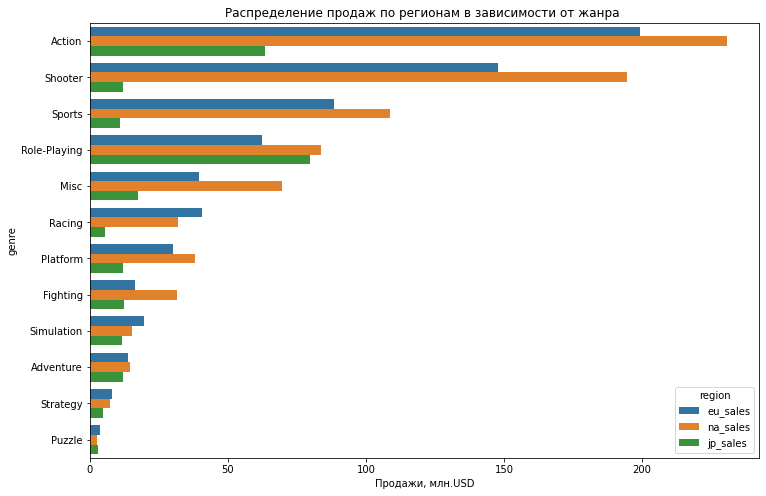

In [97]:
# построим график продаж по жанрам
#размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_reg_gen.genre,
                 x=games_reg_gen.sales,
                 
                 hue=games_reg_gen.region,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('Продажи, млн.USD')
plt.title('Распределение продаж по регионам в зависимости от жанра ');


Предпочтения  европейских и северо-американских пользователей в основном совпадают, а вкусы японского региона кардинально отличаются от остальных.

Самым популярным жанром для северо-американского и европейского пользователя является Action, тогда как японские пользователи предпочитают  жанр Role-Playing. 

In [98]:
# сохраним в переменной games_reg_gen_2014 нужные для анализа колонки и сгруппируем по названиям платформ 2014-2016 гг 
games_reg_gen_2014 = games_2014[['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['genre'],var_name='region', value_name='sales')\
.sort_values('sales', ascending=False)

In [99]:
# выведем первые 5 строк 
print(games_reg_gen_2014.head())

      genre    region  sales
8   Shooter  na_sales  79.02
12   Action  eu_sales  74.68
0    Action  na_sales  72.53
20  Shooter  eu_sales  65.52
10   Sports  na_sales  46.13


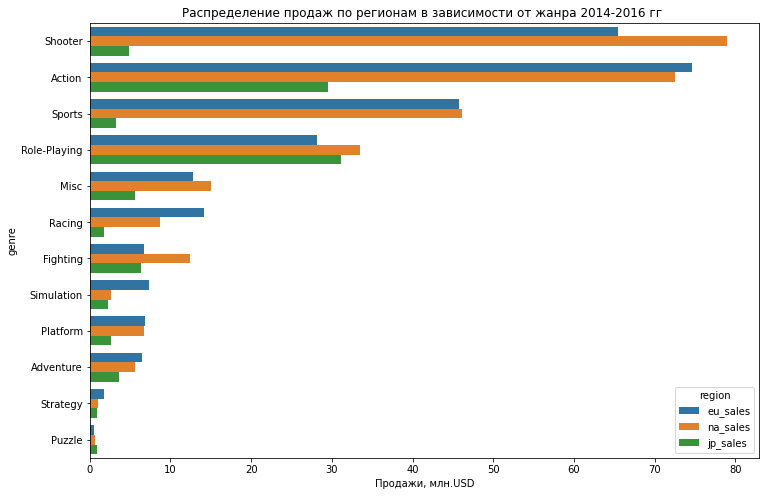

In [100]:
# построим график продаж по жанрам 2014-2016 гг
#размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_reg_gen_2014.genre,
                 x=games_reg_gen_2014.sales,
                 
                 hue=games_reg_gen_2014.region,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('Продажи, млн.USD')
plt.title('Распределение продаж по регионам в зависимости от жанра 2014-2016 гг ');



    
Предпочтения европейских и северо-американских пользователей в основном совпадают. Исключение составляют лидеры: 
    
    в европе лидером является жанр Action 
    
    в северо-американском регионе- жанр Shooter.
    
  Вкусы японского пользователя кардинально отличаются от остальных. Role-Playing предпочитается всем остальным, а любимые в Европе и Северной Америке жанры Shooter и Sports в несколько раз отстают от лидера. 

Единодушие у пользователей  всех регионов вызывает только жанр Puzzle, у него самый низкий уровень продаж .


## Влияние  рейтинга ESRB на продажи в отдельном регионе.


In [101]:
# сохраним в переменной games_reg_rating нужные для анализа колонки и сгруппируем по показателям рейтинга
games_reg_rating = games_2011[['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['rating'],var_name='region', value_name='sales')\
.sort_values('sales', ascending=False)
print(games_reg_rating.head())

     rating    region   sales
3         M  na_sales  308.45
10        M  eu_sales  250.26
0         E  na_sales  170.17
7         E  eu_sales  141.73
20  unknown  jp_sales  138.21


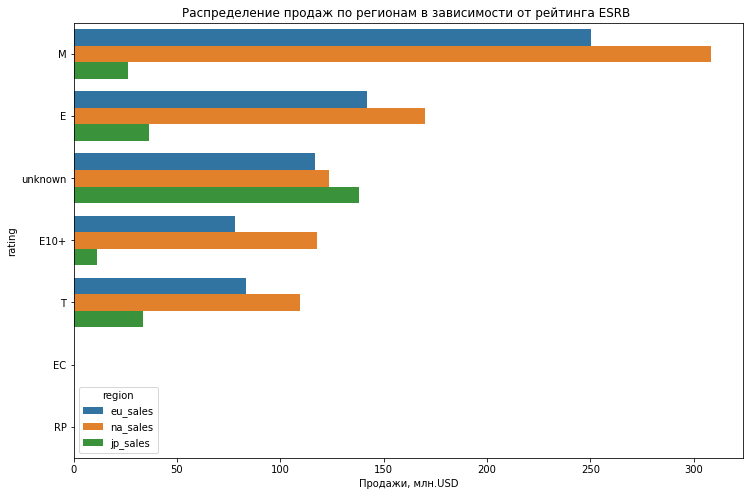

In [102]:
#построим график продаж и рейтинг ESRB
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_reg_rating.rating,
                 x=games_reg_rating.sales,
                 
                 hue=games_reg_rating.region,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('Продажи, млн.USD')
plt.title('Распределение продаж по регионам в зависимости от рейтинга ESRB ');


В Европе и Северной Америке предпочтения пользователей одинаковые лидером  являются игры  категории М - для взрослых, а в Японии лидер- категория Е - для всех.

In [103]:
# сохраним в переменной games_reg_rating_2014 нужные для анализа колонки и сгруппируем по показателям рейтинга 2014-2016гг
games_reg_rating_2014 = games_2014[['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating', as_index=False)\
.agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
.melt(id_vars=['rating'],var_name='region', value_name='sales')\
.sort_values('sales', ascending=False)
print(games_reg_rating.head())

     rating    region   sales
3         M  na_sales  308.45
10        M  eu_sales  250.26
0         E  na_sales  170.17
7         E  eu_sales  141.73
20  unknown  jp_sales  138.21


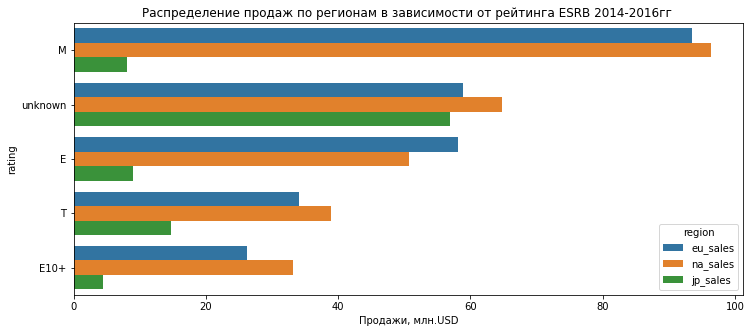

In [104]:
#построим график продаж и рейтинг ESRB 2014-2016 гг
plt.figure(figsize=(12, 5))
# задание параметров построения графика
ax = sns.barplot(y=games_reg_rating_2014.rating,
                 x=games_reg_rating_2014.sales,
                 
                 hue=games_reg_rating_2014.region,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('Продажи, млн.USD')
plt.title('Распределение продаж по регионам в зависимости от рейтинга ESRB 2014-2016гг ');



    
Рейтинговые предпочтения жителей Северной Америки и Европы совпадают, лидируют продажи игр для взрослых с рейтингом М. В Японии рейтинговые предпочтения кардинально отличаются от других регионов,  лидером продаж являются игры с неустановленным ESRB рейтингом "unknown" . Возможно, в стране восходящего солнца предпочитают игры, которым присвоен рейтинг японской организации CERO. 
    


#  Проверка гипотез.


## Проверка гипотезы 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [105]:
# сохраним в переменной games_sports список оценок пользователей игр платформы XOne удалив пропуски 
games_xbox = games_2011.query('platform == "XOne"')["user_score"].dropna().tolist()

# сохраним в переменной games_sports список оценок пользователей игр платформы PC удалив пропуски
games_pc = games_2011.query('platform == "PC"')["user_score"].dropna().tolist()


Сформулируем нулевую H0 и альтернативную H1 гипотезы:

* H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC различны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей существует метод  scipy.stats.ttest_ind. Этот метод нам подходит так как исследуемые массивы данных независимы. Параметр параметр equal_var примем равным False, поскольку размеры совокупностей различны.

Критический уровень статистической значимостиalpha = 0.05 будет для целей нашего исследования вполне достаточным.

In [106]:
# сравним средние games_xbox и games_pc 
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_xbox, 
    games_pc,
    equal_var = False # поскольку размеры данных различны используем equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


In [107]:
# сохраним в переменной games_sports список оценок пользователей игр платформы XOne удалив пропуски 
games_xbox_2014 = games_2014.query('platform == "XOne"')["user_score"].dropna().tolist()

# сохраним в переменной games_sports список оценок пользователей игр платформы PC удалив пропуски
games_pc_2014 = games_2014.query('platform == "PC"')["user_score"].dropna().tolist()


In [108]:
# сравним средние games_xbox и games_pc 
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_xbox_2014, 
    games_pc_2014,
    equal_var = False # поскольку дисперсия данных различна используем equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [109]:
# проверим результат с помощью метода mean()
print('Среднее значение совокупности games_xbox_2014:',mean(games_xbox_2014)) 
print('Среднее значение совокупности games_pc_2014:',mean(games_pc_2014))


Среднее значение совокупности games_xbox_2014: 6.594545454545455
Среднее значение совокупности games_pc_2014: 6.298360655737705


Результат:

Нулевая гипотеза о том что средние значения оценок пользователей платформ Xbox One и PC одинаковые, подтвердилась. 

Отвергаем альтернативную гипотезу. 

 ## Проверка гипотезы 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Сформулируем нулевую H0 и альтернативную H1 гипотезы:

* H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1 - Средние пользовательские рейтинги жанров Action и Sports различны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей существует метод  scipy.stats.ttest_ind. Этот метод нам подходит так как исследуемые массивы данных независимы. Параметр параметр equal_var примем равным False, поскольку размеры совокупностей различны.

Критический уровень статистической значимости alpha = 0.05  будет для целей нашего исследования вполне достаточным.

In [110]:
# сохраним в переменной games_action список оценок пользователей игр в жанре Action, удалив пропуски
games_action = games_2011.query('genre == "Action"')["user_score"].dropna().tolist()

# сохраним в переменной games_sports список оценок пользователей игр в жанре Sports, удалив пропуски
games_sports = games_2011.query('genre == "Sports"')["user_score"].dropna().tolist()


In [111]:
# сравним средние games_action и games_sports
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_action, 
    games_sports,
    equal_var = False # поскольку размеры данных различны используем equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


In [112]:
# проверим результат с помощью метода mean()
print('Среднее значение совокупности games_action:',mean(games_action)) 
print('Среднее значение совокупности games_sports:',mean(games_sports))


Среднее значение совокупности games_action: 6.775903614457832
Среднее значение совокупности games_sports: 5.650813008130081


Результат:

Нулевая гипотеза о том что средние пользовательские рейтинги жанров Action и Sports одинаковые, не подтвердилась. 

Принимаем альтернативную гипотезу. Средние пользовательские рейтинги жанров Action и Sports  различны.

In [113]:
# сохраним в переменной games_action список оценок пользователей игр в жанре Action, удалив пропуски
games_action_2014 = games_2014.query('genre == "Action"')["user_score"].dropna().tolist()

# сохраним в переменной games_sports список оценок пользователей игр в жанре Sports, удалив пропуски
games_sports_2014 = games_2014.query('genre == "Sports"')["user_score"].dropna().tolist()


In [114]:
# сравним средние games_action и games_sports
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    games_action_2014, 
    games_sports_2014,
    equal_var = False # поскольку дисперсия данных различна  используем equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [115]:
# проверим результат с помощью метода mean()
print('Среднее значение совокупности games_action_2014:',mean(games_action_2014)) 
print('Среднее значение совокупности games_sports_2014:',mean(games_sports_2014))


Среднее значение совокупности games_action_2014: 6.760606060606061
Среднее значение совокупности games_sports_2014: 5.225196850393701




Нулевая гипотеза о том что средние пользовательские рейтинги жанров Action и Sports одинаковые, не подтвердилась.

Принимаем альтернативную гипотезу. Средние пользовательские рейтинги жанров Action и Sports различны.


# Общий вывод.

Работа над проектом включала в себя следующие этапы:
* знакомство с данными
* предподготовка данных
* Исследовательский анализ с помощью методов визуализации
* Проверка гипотез при помощи статистических методов
* Формирование выводов

В результате проведённых исследований выяснилось, что :
    
* Пик производства компьютерных игр приходился на период с 2006 по 2011 годы, максимум был достигнут в 2008 году. После него начался спад, который продолжается по настоящее время.

* Срок существования платформ варьируется от 1 года до 30 лет, средний срок существования составляет 6 лет. Более перспективными в настоящее время платформами являются PS4,WiiU и 3DS, но топы самых популярных платформ имеют региональные отличия.Если топ европейских и североамериканских лидеров по продажам отличаются не кардинально, то в Японии лидер продаж  на 50% опережает остальные платформы, есть отличия и в списке предпочтений пользователей.

* Корреляция оценок пользователей и критиков достаточно сильная, что свидетельствует о преимущественном совпадении их оценок, тогда как зависимость между оценками и продажами оказалась слабой. Но не следует забывть, что графе оценок большой процент пропусков, поэтому этот вывод может быть недостаточно корректным и нуждается в дополнительных исследованиях.

* Наиболее популярные жанры игр  в целом по всем регионам это Action, Shooter и Role-Playing; в Европе и Северной Америке вкусы пользователей совпадают и в тройку лидеров входят Shooter,Action и Sports , а в Японии тройка лидеров включает в себя Role-Playing, Action и Misc.

* Предпочтения пользователей по рейтингу ESRB в Европе и Северной Америке  одинаковые: лидером  являются игры  категории М - для взрослых, а в Японии лидер- категория не определена-"unknown".
 
* Гипотеза :Средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась.

* Гипотеза :Средние пользовательские рейтинги жанров Action  и Sports разные подтвердилась.

Исследование проводилось для выявления определяющих  успешность игры закономерностей. Наиболее успешная игра должна быть создана на популярной платформе в начале или на пике жизненного цикла.Популярность платформ зависит от региона планируемых продаж. В настоящее время лучше, если эта игра будет в жанре Shooter, Action и Sports для Европы и Северной Америки или в жанре Role-Playing, Action и Misc для Японии. Райтинг ESRB предпочтителен "М"(для взрослых) в Европе и Северной Америке.В Японии видимо существуют свои рейтинги. В данных были представлены только рейтинги  организации ESRB, поэтому в информации об играх, производители которых возможно пользуются рейтингами других организаций, данные содержат пропуски. В показателях рейтинга необходимо дополнительное уточнение данных. Поведение пользователей Японии кардинально отличается от пользователей Европы и Северной Америки. Это необхлдимо учитывать при проведении рекламной компании и продвижения продаж.

